In [359]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
# für Visualisierung
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

# 1. Load data

- Data Set: FD001
- Train trjectories: 100
- Test trajectories: 100
- Conditions: ONE (Sea Level)
- Fault Modes: ONE (HPC Degradation)

The input contains 26 columns
- UnitNumber: of motor
- Cycle: time step
- 3 operational settings
- 21 sensor measurements

In [360]:
# Define column names
index_columns_names =  ["unit_number","cycle"]
operational_settings_columns_names = ["setting_"+str(i) for i in range(1,4)]
sensor_measure_columns_names =["sensor_"+str(i) for i in range(1,22)]
input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names

Sensor dictionairy from corresponding paper: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4711414

In [361]:
sensor_dict={}
dict_list=[ "(Total temperature at fan inlet) (◦R)",
"(Total temperature at LPC outlet) (◦R)",
"(Total temperature at HPC outlet) (◦R)",
"(Total temperature at LPT outlet) (◦R)",
"(Pressure at fan inlet) (psia)",
"(Total pressure in bypass-duct) (psia)",
"(Total pressure at HPC outlet) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(Static pressure at HPC outlet) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Demanded fan speed) (rpm)",
"(Demanded corrected fan speed) (rpm)",
"(HPT coolant bleed) (lbm/s)",
"(LPT coolant bleed) (lbm/s)" ]
i=1
for x in dict_list :
    sensor_dict['sensor_'+str(i)]=x
    i+=1
sensor_dict

{'sensor_1': '(Total temperature at fan inlet) (◦R)',
 'sensor_2': '(Total temperature at LPC outlet) (◦R)',
 'sensor_3': '(Total temperature at HPC outlet) (◦R)',
 'sensor_4': '(Total temperature at LPT outlet) (◦R)',
 'sensor_5': '(Pressure at fan inlet) (psia)',
 'sensor_6': '(Total pressure in bypass-duct) (psia)',
 'sensor_7': '(Total pressure at HPC outlet) (psia)',
 'sensor_8': '(Physical fan speed) (rpm)',
 'sensor_9': '(Physical core speed) (rpm)',
 'sensor_10': '(Engine pressure ratio(P50/P2)',
 'sensor_11': '(Static pressure at HPC outlet) (psia)',
 'sensor_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 'sensor_13': '(Corrected fan speed) (rpm)',
 'sensor_14': '(Corrected core speed) (rpm)',
 'sensor_15': '(Bypass Ratio) ',
 'sensor_16': '(Burner fuel-air ratio)',
 'sensor_17': '(Bleed Enthalpy)',
 'sensor_18': '(Demanded fan speed) (rpm)',
 'sensor_19': '(Demanded corrected fan speed) (rpm)',
 'sensor_20': '(HPT coolant bleed) (lbm/s)',
 'sensor_21': '(LPT coolant bleed) 

#  2.Initial Data Inspection

In [362]:
train_df = pd.read_csv('./data/train_FD001.txt',sep='\s+', header=None, names=input_file_column_names)
test_df = pd.read_csv('./data/test_FD001.txt',sep='\s+', header=None, names=input_file_column_names)
y_test = pd.read_csv('./data/RUL_FD001.txt',sep='\s+', header=None, names=["RUL"])
#train_df.columns = input_file_column_names
test_df.columns = input_file_column_names
print("Training Data Rows {}, Columns {}".format(train_df.shape[0], train_df.shape[1]))
print("Test Data Rows {}, Columns {}".format(test_df.shape[0], test_df.shape[1]))
train_df.head()

Training Data Rows 20631, Columns 26
Test Data Rows 13096, Columns 26


unit_number  cycle  setting_1  setting_2  setting_3  sensor_1  sensor_2  \
0            1      1    -0.0007    -0.0004      100.0    518.67    641.82   
1            1      2     0.0019    -0.0003      100.0    518.67    642.15   
2            1      3    -0.0043     0.0003      100.0    518.67    642.35   
3            1      4     0.0007     0.0000      100.0    518.67    642.35   
4            1      5    -0.0019    -0.0002      100.0    518.67    642.37   

   sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  sensor_9  \
0   1589.70   1400.60     14.62     21.61    554.36   2388.06   9046.19   
1   1591.82   1403.14     14.62     21.61    553.75   2388.04   9044.07   
2   1587.99   1404.20     14.62     21.61    554.26   2388.08   9052.94   
3   1582.79   1401.87     14.62     21.61    554.45   2388.11   9049.48   
4   1582.85   1406.22     14.62     21.61    554.00   2388.06   9055.15   

   sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  \
0        1.3      47.47     521.66    2388.02    8138.62     8.4195   
1        1.3      47.49     522.28    2388.07    8131.49     8.4318   
2        1.3      47.27     522.42    2388.03    8133.23     8.4178   
3        1.3      47.13     522.86    2388.08    8133.83     8.3682   
4        1.3      47.28     522.19    2388.04    8133.80     8.4294   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0       0.03        392       2388      100.0      39.06    23.4190  
1       0.03        392       2388      100.0      39.00    23.4236  
2       0.03        390       2388      100.0      38.95    23.3442  
3       0.03        392       2388      100.0      38.88    23.3739  
4       0.03        393       2388      100.0      38.90    23.4044

In [363]:
print("Test Data Rows {}, Columns {}".format(test_df.shape[0], test_df.shape[1]))
test_df.head()

Test Data Rows 13096, Columns 26


unit_number  cycle  setting_1  setting_2  setting_3  sensor_1  sensor_2  \
0            1      1     0.0023     0.0003      100.0    518.67    643.02   
1            1      2    -0.0027    -0.0003      100.0    518.67    641.71   
2            1      3     0.0003     0.0001      100.0    518.67    642.46   
3            1      4     0.0042     0.0000      100.0    518.67    642.44   
4            1      5     0.0014     0.0000      100.0    518.67    642.51   

   sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  sensor_9  \
0   1585.29   1398.21     14.62     21.61    553.90   2388.04   9050.17   
1   1588.45   1395.42     14.62     21.61    554.85   2388.01   9054.42   
2   1586.94   1401.34     14.62     21.61    554.11   2388.05   9056.96   
3   1584.12   1406.42     14.62     21.61    554.07   2388.03   9045.29   
4   1587.19   1401.92     14.62     21.61    554.16   2388.01   9044.55   

   sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  \
0        1.3      47.20     521.72    2388.03    8125.55     8.4052   
1        1.3      47.50     522.16    2388.06    8139.62     8.3803   
2        1.3      47.50     521.97    2388.03    8130.10     8.4441   
3        1.3      47.28     521.38    2388.05    8132.90     8.3917   
4        1.3      47.31     522.15    2388.03    8129.54     8.4031   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0       0.03        392       2388      100.0      38.86    23.3735  
1       0.03        393       2388      100.0      39.02    23.3916  
2       0.03        393       2388      100.0      39.08    23.4166  
3       0.03        391       2388      100.0      39.00    23.3737  
4       0.03        390       2388      100.0      38.99    23.4130

In [364]:
units = train_df["unit_number"].unique()
print("The training data contains {} turbofan motors.".format(len(units)))

units = test_df["unit_number"].unique()
print("The test data contains {} turbofan motors.".format(len(units)))

The training data contains 100 turbofan motors.
The test data contains 100 turbofan motors.


In [365]:
print("Y test shape: ", y_test.shape)

Y test shape:  (100, 1)


## 2.1 Check  missing values

In [366]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_number  20631 non-null  int64  
 1   cycle        20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   sensor_1     20631 non-null  float64
 6   sensor_2     20631 non-null  float64
 7   sensor_3     20631 non-null  float64
 8   sensor_4     20631 non-null  float64
 9   sensor_5     20631 non-null  float64
 10  sensor_6     20631 non-null  float64
 11  sensor_7     20631 non-null  float64
 12  sensor_8     20631 non-null  float64
 13  sensor_9     20631 non-null  float64
 14  sensor_10    20631 non-null  float64
 15  sensor_11    20631 non-null  float64
 16  sensor_12    20631 non-null  float64
 17  sensor_13    20631 non-null  float64
 18  sensor_14    20631 non-null  float64
 19  sens

In [367]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_number  13096 non-null  int64  
 1   cycle        13096 non-null  int64  
 2   setting_1    13096 non-null  float64
 3   setting_2    13096 non-null  float64
 4   setting_3    13096 non-null  float64
 5   sensor_1     13096 non-null  float64
 6   sensor_2     13096 non-null  float64
 7   sensor_3     13096 non-null  float64
 8   sensor_4     13096 non-null  float64
 9   sensor_5     13096 non-null  float64
 10  sensor_6     13096 non-null  float64
 11  sensor_7     13096 non-null  float64
 12  sensor_8     13096 non-null  float64
 13  sensor_9     13096 non-null  float64
 14  sensor_10    13096 non-null  float64
 15  sensor_11    13096 non-null  float64
 16  sensor_12    13096 non-null  float64
 17  sensor_13    13096 non-null  float64
 18  sensor_14    13096 non-null  float64
 19  sens

All values are numeric and there are no missing values.

In [368]:
# Check if there are missing cycles in any unit
grouped = train_df.groupby('unit_number')
missing_cycles = []
for unit, group in grouped:
    # Check if all cycles from 1 to max cycle number exist
    if not all(cycle in group['cycle'].values for cycle in range(1, group['cycle'].max() + 1)):
        missing_cycles.append(unit)
print("Number of missing cycles: " ,missing_cycles)

Number of missing cycles:  []


# 2.2. Statistics summary

In [369]:
train_df.describe(include='all')

unit_number         cycle     setting_1     setting_2  setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000    20631.0   
mean      51.506568    108.807862     -0.000009      0.000002      100.0   
std       29.227633     68.880990      0.002187      0.000293        0.0   
min        1.000000      1.000000     -0.008700     -0.000600      100.0   
25%       26.000000     52.000000     -0.001500     -0.000200      100.0   
50%       52.000000    104.000000      0.000000      0.000000      100.0   
75%       77.000000    156.000000      0.001500      0.000300      100.0   
max      100.000000    362.000000      0.008700      0.000600      100.0   

           sensor_1      sensor_2      sensor_3      sensor_4      sensor_5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

           sensor_6      sensor_7      sensor_8      sensor_9     sensor_10  \
count  20631.000000  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean      21.609803    553.367711   2388.096652   9065.242941  1.300000e+00   
std        0.001389      0.885092      0.070985     22.082880  4.660829e-13   
min       21.600000    549.850000   2387.900000   9021.730000  1.300000e+00   
25%       21.610000    552.810000   2388.050000   9053.100000  1.300000e+00   
50%       21.610000    553.440000   2388.090000   9060.660000  1.300000e+00   
75%       21.610000    554.010000   2388.140000   9069.420000  1.300000e+00   
max       21.610000    556.060000   2388.560000   9244.590000  1.300000e+00   

          sensor_11     sensor_12     sensor_13     sensor_14     sensor_15  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean      47.541168    521.413470   2388.096152   8143.752722      8.442146   
std        0.267087      0.737553      0.071919     19.076176      0.037505   
min       46.850000    518.690000   2387.880000   8099.940000      8.324900   
25%       47.350000    520.960000   2388.040000   8133.245000      8.414900   
50%       47.510000    521.480000   2388.090000   8140.540000      8.438900   
75%       47.700000    521.950000   2388.140000   8148.310000      8.465600   
max       48.530000    523.380000   2388.560000   8293.720000      8.584800   

          sensor_16     sensor_17  sensor_18  sensor_19     sensor_20  \
count  2.063100e+04  20631.000000    20631.0    20631.0  20631.000000   
mean   3.000000e-02    393.210654     2388.0      100.0     38.816271   
std    1.556432e-14      1.548763        0.0        0.0      0.180746   
min    3.000000e-02    388.000000     2388.0      100.0     38.140000   
25%    3.000000e-02    392.000000     2388.0      100.0     38.700000   
50%    3.000000e-02    393.000000     2388.0      100.0     38.830000   
75%    3.000000e-02    394.000000     2388.0      100.0     38.950000   
max    3.000000e-02    400.000000     2388.0      100.0     39.430000   

          sensor_21  
count  20631.000000  
mean      23.289705  
std        0.108251  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400

In [370]:
test_df.describe(include='all')

unit_number         cycle     setting_1     setting_2  setting_3  \
count  13096.000000  13096.000000  13096.000000  13096.000000    13096.0   
mean      51.543907     76.836515     -0.000011      0.000004      100.0   
std       28.289423     53.057749      0.002203      0.000294        0.0   
min        1.000000      1.000000     -0.008200     -0.000600      100.0   
25%       28.000000     33.000000     -0.001500     -0.000200      100.0   
50%       52.000000     69.000000     -0.000000     -0.000000      100.0   
75%       76.000000    113.000000      0.001500      0.000300      100.0   
max      100.000000    303.000000      0.007800      0.000700      100.0   

           sensor_1      sensor_2      sensor_3      sensor_4      sensor_5  \
count  1.309600e+04  13096.000000  13096.000000  13096.000000  1.309600e+04   
mean   5.186700e+02    642.475088   1588.099204   1404.735362  1.462000e+01   
std    6.014263e-11      0.400899      5.003274      6.688309  2.671743e-12   
min    5.186700e+02    641.130000   1569.040000   1384.390000  1.462000e+01   
25%    5.186700e+02    642.197500   1584.600000   1399.950000  1.462000e+01   
50%    5.186700e+02    642.460000   1587.990000   1404.440000  1.462000e+01   
75%    5.186700e+02    642.740000   1591.362500   1409.050000  1.462000e+01   
max    5.186700e+02    644.300000   1607.550000   1433.360000  1.462000e+01   

           sensor_6      sensor_7      sensor_8      sensor_9     sensor_10  \
count  13096.000000  13096.000000  13096.000000  13096.000000  1.309600e+04   
mean      21.609701    553.757523   2388.070964   9058.407363  1.300000e+00   
std        0.001704      0.681286      0.057442     11.436261  3.157595e-13   
min       21.600000    550.880000   2387.890000   9024.530000  1.300000e+00   
25%       21.610000    553.310000   2388.030000   9051.020000  1.300000e+00   
50%       21.610000    553.800000   2388.070000   9057.320000  1.300000e+00   
75%       21.610000    554.240000   2388.110000   9064.110000  1.300000e+00   
max       21.610000    555.840000   2388.300000   9155.030000  1.300000e+00   

          sensor_11     sensor_12     sensor_13     sensor_14     sensor_15  \
count  13096.000000  13096.000000  13096.000000  13096.000000  13096.000000   
mean      47.416204    521.747724   2388.071025   8138.947817      8.425844   
std        0.195917      0.559627      0.056934     10.188605      0.029009   
min       46.800000    519.380000   2387.890000   8108.500000      8.332800   
25%       47.270000    521.380000   2388.030000   8132.310000      8.405600   
50%       47.410000    521.780000   2388.070000   8138.390000      8.424900   
75%       47.540000    522.150000   2388.110000   8144.360000      8.444300   
max       48.260000    523.760000   2388.320000   8220.480000      8.541400   

          sensor_16     sensor_17  sensor_18  sensor_19     sensor_20  \
count  1.309600e+04  13096.000000    13096.0    13096.0  13096.000000   
mean   3.000000e-02    392.571625     2388.0      100.0     38.892502   
std    8.823140e-15      1.233577        0.0        0.0      0.141681   
min    3.000000e-02    389.000000     2388.0      100.0     38.310000   
25%    3.000000e-02    392.000000     2388.0      100.0     38.800000   
50%    3.000000e-02    393.000000     2388.0      100.0     38.900000   
75%    3.000000e-02    393.000000     2388.0      100.0     38.990000   
max    3.000000e-02    397.000000     2388.0      100.0     39.410000   

          sensor_21  
count  13096.000000  
mean      23.335743  
std        0.084120  
min       22.935400  
25%       23.281600  
50%       23.339200  
75%       23.393600  
max       23.641900

## 2.3 Remove columns containing only constants

In [371]:
constant_columns = train_df.columns[train_df.nunique() == 1]

# Display constant value columns
constant_value_df = train_df[constant_columns]
print("Constant value columns:")
print(constant_value_df)

Constant value columns:
       setting_3  sensor_1  sensor_5  sensor_10  sensor_16  sensor_18  \
0          100.0    518.67     14.62        1.3       0.03       2388   
1          100.0    518.67     14.62        1.3       0.03       2388   
2          100.0    518.67     14.62        1.3       0.03       2388   
3          100.0    518.67     14.62        1.3       0.03       2388   
4          100.0    518.67     14.62        1.3       0.03       2388   
...          ...       ...       ...        ...        ...        ...   
20626      100.0    518.67     14.62        1.3       0.03       2388   
20627      100.0    518.67     14.62        1.3       0.03       2388   
20628      100.0    518.67     14.62        1.3       0.03       2388   
20629      100.0    518.67     14.62        1.3       0.03       2388   
20630      100.0    518.67     14.62        1.3       0.03       2388   

       sensor_19  
0          100.0  
1          100.0  
2          100.0  
3          100.0  
4   

The column setting_3, sensor_1, sensor_5, sensor_16,  sensor_10, sensor_18, and sensor_19 in  only contain a constant value both the training and test set and therefore add no information to the prediction. 
Moreover, the sensor_6 value exhibits a low std of 0.001389 which shows that there is minimal variability and that the value is mostly constant except for a few outliers. This is confirmed when observing the box plot and sensor signal plots below. Therefore, these sensor values can be dropped. 

In [372]:
columns_to_remove = ['setting_3',  'sensor_1', 'sensor_5', 'sensor_6', 'sensor_10','sensor_16', 'sensor_18', 'sensor_19']
train_df = train_df.drop(columns_to_remove, axis=1)
test_df = test_df.drop(columns_to_remove, axis=1)
sensor_names = [s for s in sensor_measure_columns_names if s not in columns_to_remove]

## 2.4.Add RUL to train data set

In [373]:
def add_rul(df):
    # merge max cycles back into train dataframe
    df_merged = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_number', right_index=True)
    # Calculate remaining useful life for each row
    remaining_useful_life = df_merged["max_cycle"] - df_merged["cycle"]
    df_merged["RUL"] = remaining_useful_life
    df_merged = df_merged.drop("max_cycle", axis=1)
    return df_merged
    
train_df = add_rul(train_df)
train_df.head()


unit_number  cycle  setting_1  setting_2  sensor_2  sensor_3  sensor_4  \
0            1      1    -0.0007    -0.0004    641.82   1589.70   1400.60   
1            1      2     0.0019    -0.0003    642.15   1591.82   1403.14   
2            1      3    -0.0043     0.0003    642.35   1587.99   1404.20   
3            1      4     0.0007     0.0000    642.35   1582.79   1401.87   
4            1      5    -0.0019    -0.0002    642.37   1582.85   1406.22   

   sensor_7  sensor_8  sensor_9  sensor_11  sensor_12  sensor_13  sensor_14  \
0    554.36   2388.06   9046.19      47.47     521.66    2388.02    8138.62   
1    553.75   2388.04   9044.07      47.49     522.28    2388.07    8131.49   
2    554.26   2388.08   9052.94      47.27     522.42    2388.03    8133.23   
3    554.45   2388.11   9049.48      47.13     522.86    2388.08    8133.83   
4    554.00   2388.06   9055.15      47.28     522.19    2388.04    8133.80   

   sensor_15  sensor_17  sensor_20  sensor_21  RUL  
0     8.4195        392      39.06    23.4190   30  
1     8.4318        392      39.00    23.4236   29  
2     8.4178        390      38.95    23.3442   28  
3     8.3682        392      38.88    23.3739   27  
4     8.4294        393      38.90    23.4044   26

# 3. Statistical Analysis

## 3.1 Feature Distribution

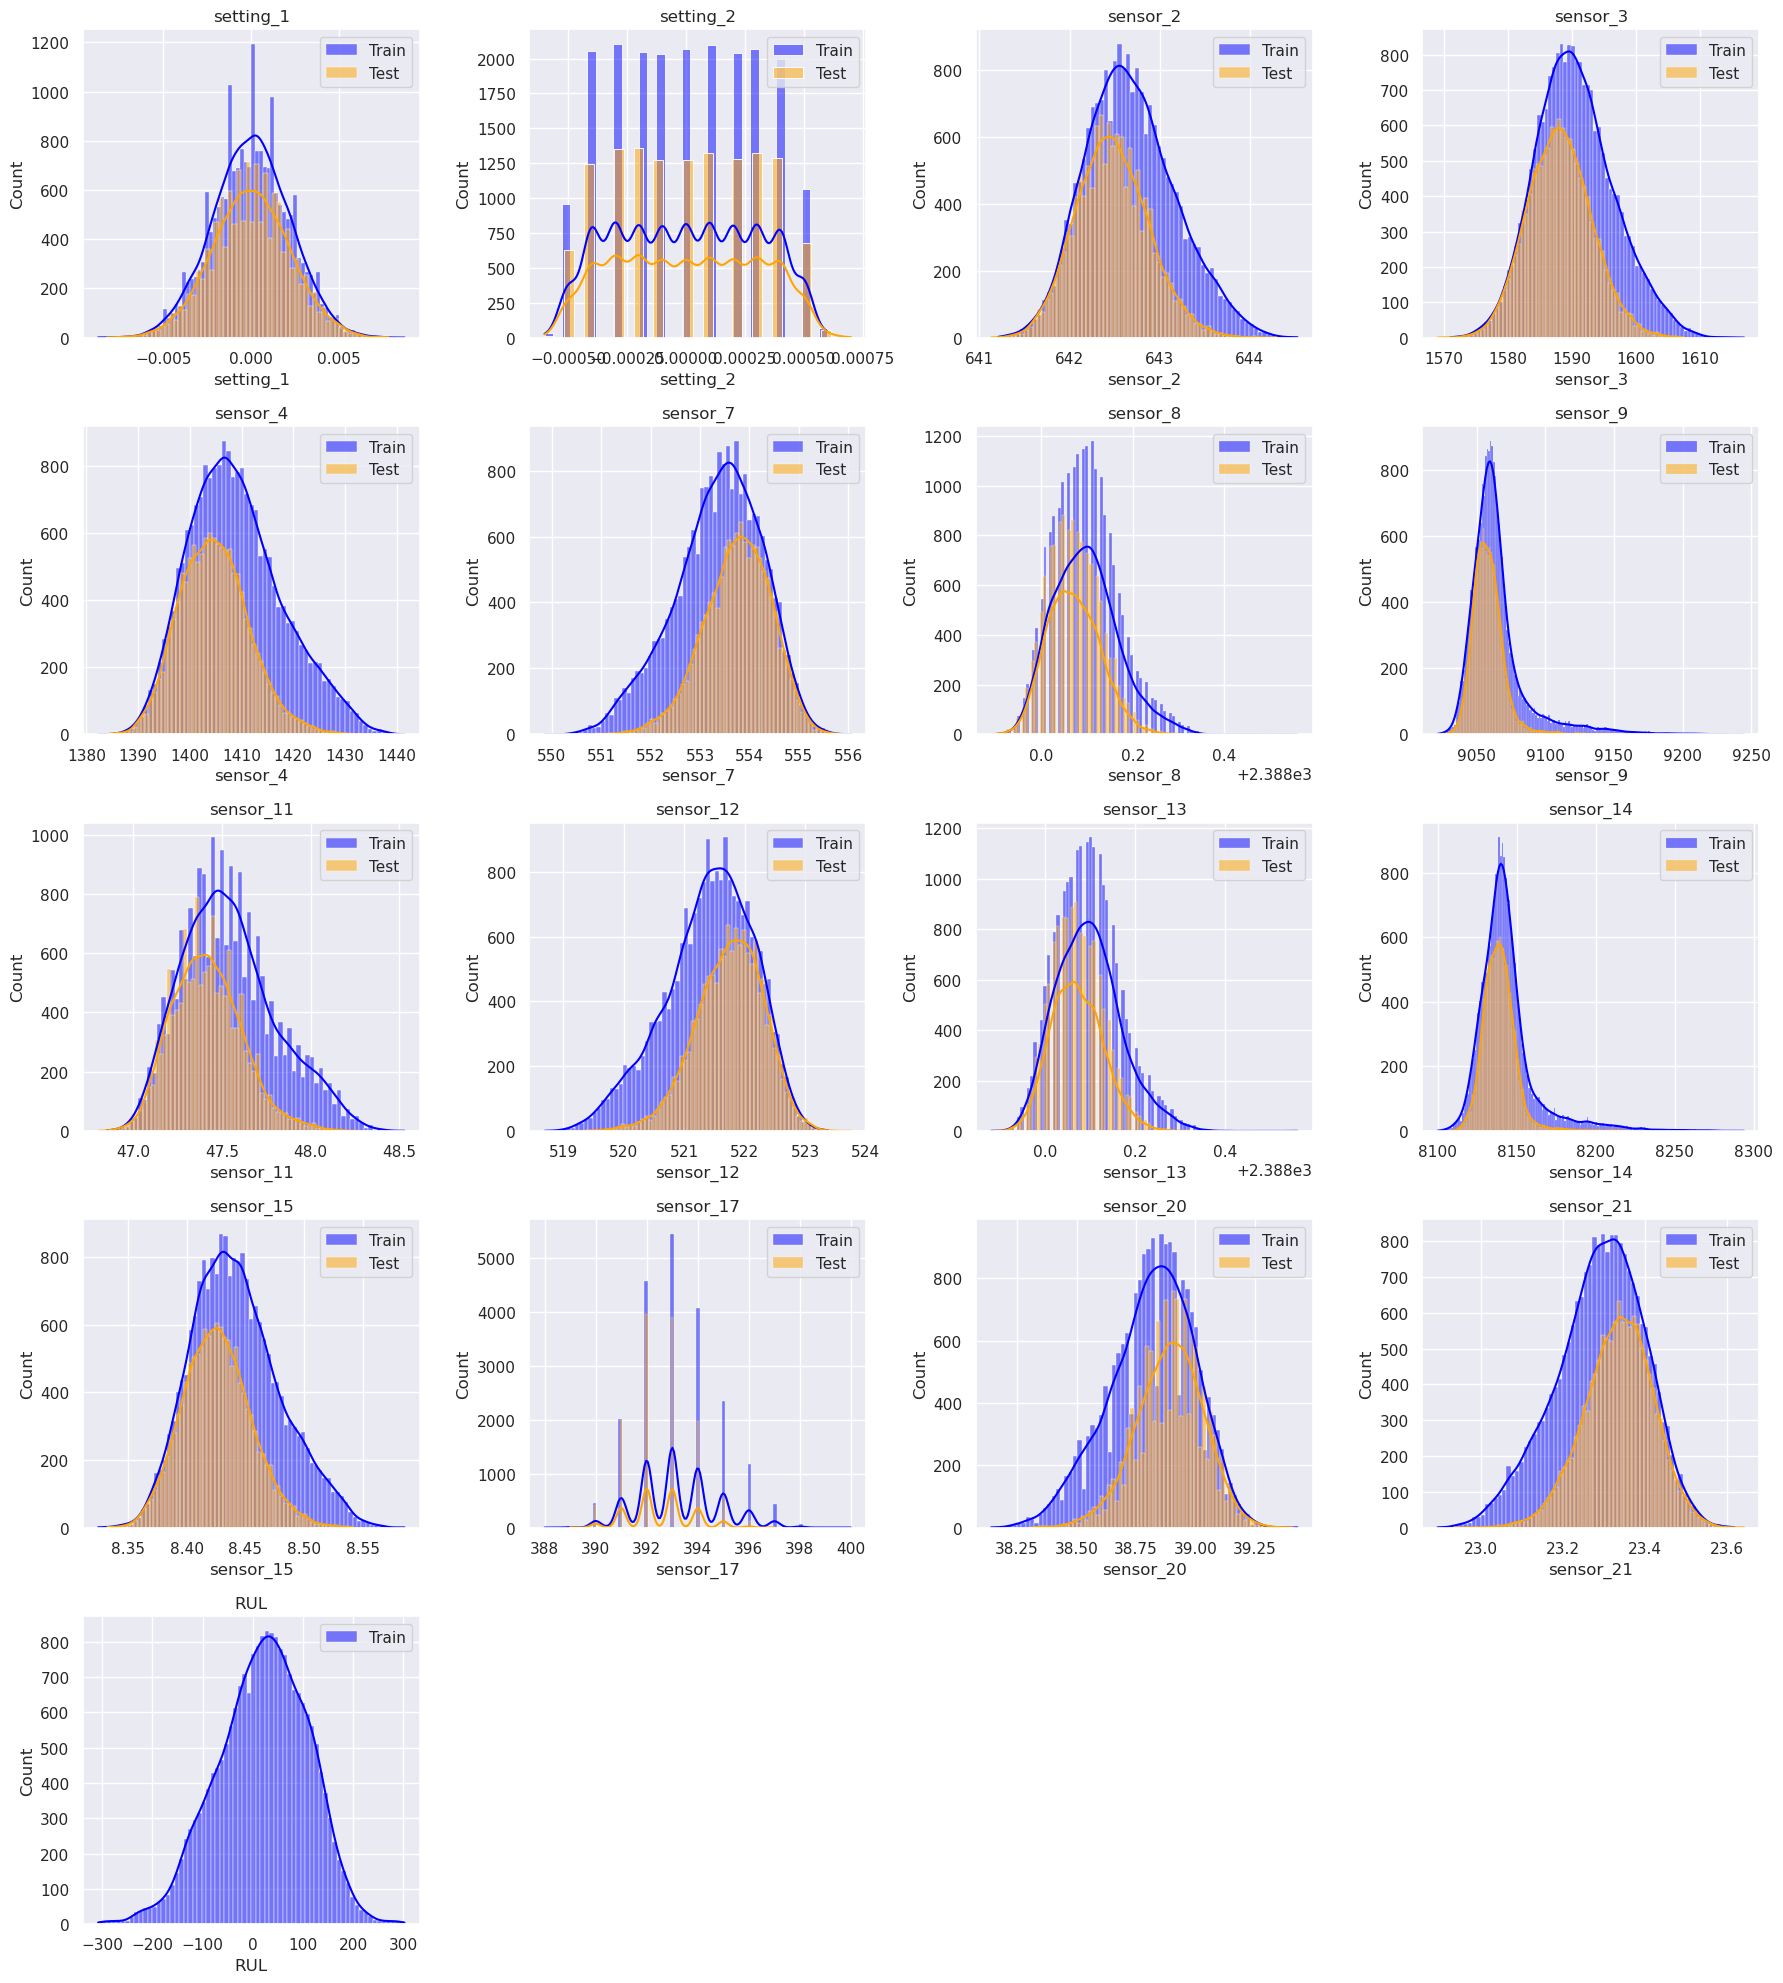

In [374]:
# Calculate the number of rows needed
columns = train_df.drop(['unit_number', 'cycle'], axis=1).columns
num_rows = len(columns) // 4
if len(columns) % 4 != 0:
    num_rows += 1

fig, axes = plt.subplots(num_rows, 4, figsize=(18, 4 * num_rows))
axes = axes.flatten()

# Plot histograms for each sensor
for i, feature in enumerate(columns):
    ax = axes[i]
    sns.histplot(train_df[feature], kde=True, color='blue', label='Train', ax=ax)
    if feature != 'RUL':
        sns.histplot(test_df[feature], kde=True, color='orange', label='Test', ax=ax)
    ax.set_title(feature)
    ax.legend()

# Hide empty subplots
for i in range(len(columns), num_rows * 4):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

 almost all variables follow a  gaussian distribution which is slightly skewed, except sensor_17 and setting_2.

### 3.1.1 Maximum cycle distribution

Each motor unit has a different maximum life cycle.

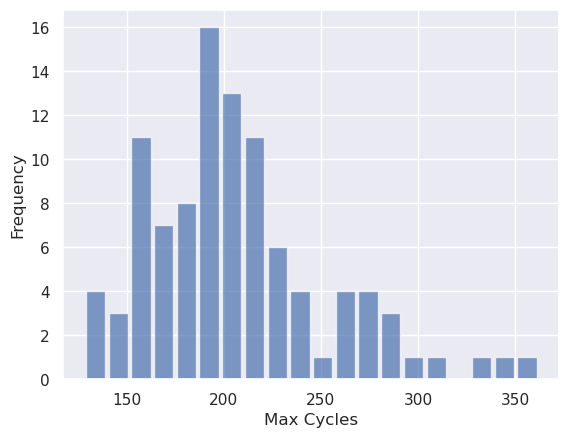

In [375]:
grouped_by_unit = train_df.groupby(by="unit_number")
max_cycle = grouped_by_unit["cycle"].max()
plt.hist(x=max_cycle, bins=20,alpha=0.7, rwidth=0.85);
plt.xlabel('Max Cycles')
plt.ylabel('Frequency');

The distribution is a bit skewed on left side. Mostly, the maximum time cycle achieved before failure is between 190 and 210.

In [376]:
print("Maximum life cycle in the training set is :", max_cycle.max())
print("Minimum life cycle in the training set is :", max_cycle.min())

Maximum life cycle in the training set is : 362
Minimum life cycle in the training set is : 128


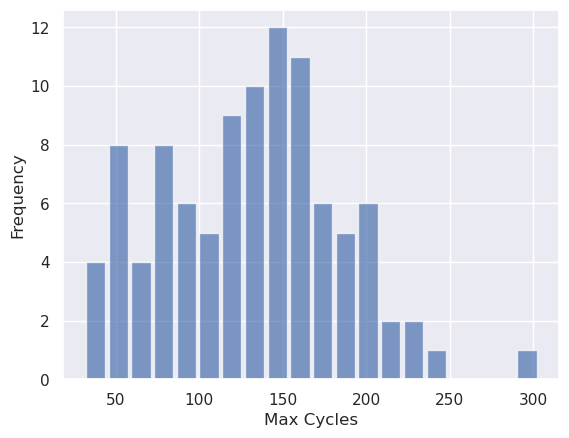

In [377]:
grouped_by_unit = test_df.groupby(by="unit_number")
max_cycle = grouped_by_unit["cycle"].max()
plt.hist(x=max_cycle, bins=20,alpha=0.7, rwidth=0.85);
plt.xlabel('Max Cycles')
plt.ylabel('Frequency');

In [378]:
print("Maximum cycle number in the test set is :", max_cycle.max())
print("Minimum cycle number in the test set is :", max_cycle.min())

Maximum cycle number in the test set is : 303
Minimum cycle number in the test set is : 31


**The sliding window size should be smaller than 31 for this dataset**

## 3.2 Correlation Analysis

### 3.2.1 Correlation between sensor measurements

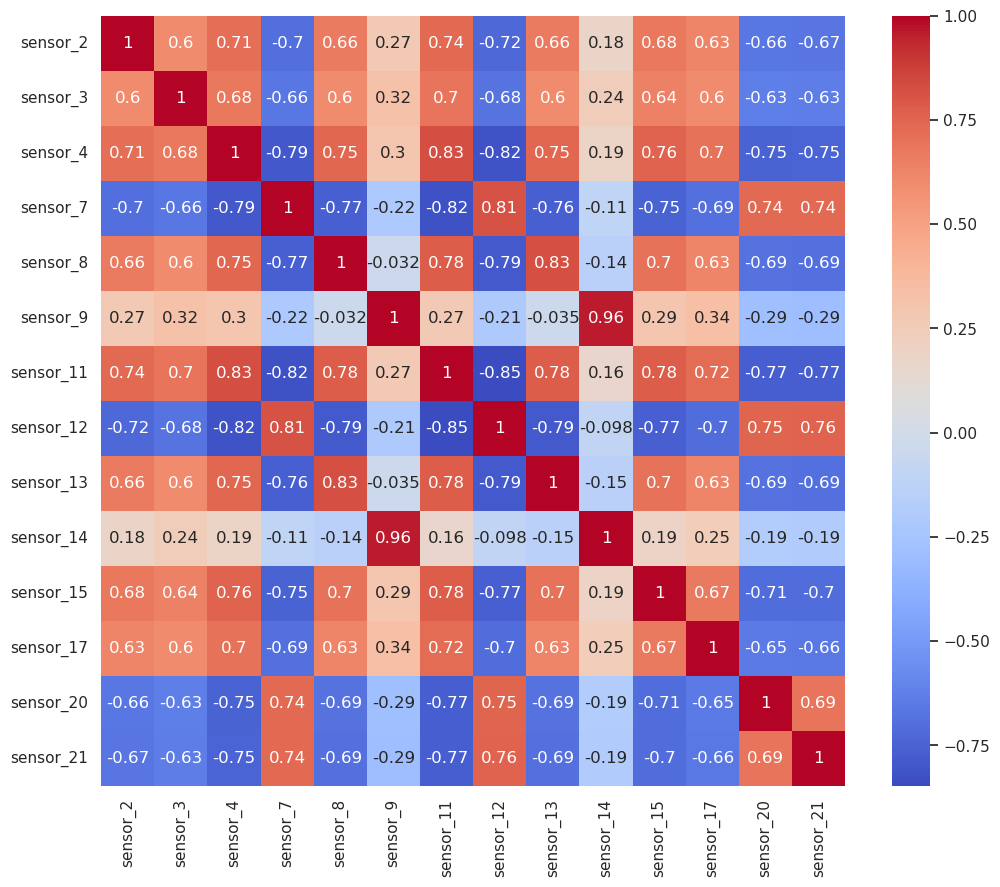

In [379]:
plt.figure(figsize=(12,10))
corr = train_df[sensor_names].corr()
sns.heatmap(corr,annot=True, cmap = 'coolwarm')
plt.show()

Some sensor values are highly correlated with each other. 

In [380]:
def get_high_correlation_pairs(corr_matrix, threshold=0.8):
    # Get the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find index of feature pairs with correlation greater than the threshold
    high_corr_pairs = [(sensor1, sensor2, corr_matrix.loc[sensor1, sensor2])
                       for sensor1 in upper.columns for sensor2 in upper.index
                       if abs(upper.loc[sensor1, sensor2]) > threshold]
    
    return high_corr_pairs

# Get the high correlation pairs
high_corr_pairs = get_high_correlation_pairs(corr, threshold=0.8)

# Output the list of high correlation pairs
print("High correlation pairs (correlation > 0.8):")
for sensor1, sensor2, corr_value in high_corr_pairs:
    print(f"{sensor1} {sensor_dict[sensor1]} and {sensor2} {sensor_dict[sensor2]}: {corr_value:.2f}")

High correlation pairs (correlation > 0.8):
sensor_4 (Total temperature at LPT outlet) (◦R) and sensor_11 (Static pressure at HPC outlet) (psia): 0.83
sensor_4 (Total temperature at LPT outlet) (◦R) and sensor_12 (Ratio of fuel flow to Ps30) (pps/psia): -0.82
sensor_7 (Total pressure at HPC outlet) (psia) and sensor_11 (Static pressure at HPC outlet) (psia): -0.82
sensor_7 (Total pressure at HPC outlet) (psia) and sensor_12 (Ratio of fuel flow to Ps30) (pps/psia): 0.81
sensor_8 (Physical fan speed) (rpm) and sensor_13 (Corrected fan speed) (rpm): 0.83
sensor_9 (Physical core speed) (rpm) and sensor_14 (Corrected core speed) (rpm): 0.96
sensor_11 (Static pressure at HPC outlet) (psia) and sensor_12 (Ratio of fuel flow to Ps30) (pps/psia): -0.85


### 3.2.2 Correlation to RUL

In [381]:
train_df.corr()['RUL'].sort_values(ascending=False)

RUL            1.000000
sensor_12      0.409684
sensor_7       0.400871
sensor_21      0.399164
sensor_20      0.399133
setting_1      0.000030
setting_2     -0.015155
unit_number   -0.020102
sensor_8      -0.300349
sensor_13     -0.302860
sensor_14     -0.312497
sensor_9      -0.359672
sensor_2      -0.375375
sensor_3      -0.376076
sensor_17     -0.392579
sensor_15     -0.402562
sensor_4      -0.427138
sensor_11     -0.429865
cycle         -0.810904
Name: RUL, dtype: float64

- Strong positive correlation (>= 0.5): sensor_12, sensor_7, sensor_21, sensor_20
- Strong negative correlation (<= -0,5) : sensor_13, sensor_3, sensor_8, sensor_17, sensor_2, sensor_15, sensor_4, sensor_11
- weak correlation (abs value y< 0.5):  unit_number, setting_2, setting_1, sensor_14, sensor_9 have a weak correlation


### 3.2.3 Correlation to  Settings

In [382]:
train_df.corr()['setting_1'].sort_values(ascending=False)

setting_1      1.000000
setting_2      0.011660
sensor_11      0.011658
sensor_4       0.009544
sensor_2       0.009030
sensor_15      0.007652
sensor_17      0.002599
sensor_13      0.002318
RUL            0.000030
sensor_8      -0.000427
sensor_12     -0.001491
sensor_9      -0.004279
sensor_14     -0.004469
cycle         -0.004527
sensor_3      -0.005651
sensor_20     -0.005713
sensor_7      -0.009437
sensor_21     -0.014559
unit_number   -0.017895
Name: setting_1, dtype: float64

In [383]:
train_df.corr()['setting_2'].sort_values(ascending=False)

setting_2      1.000000
sensor_13      0.018156
cycle          0.016132
sensor_4       0.014673
sensor_15      0.014156
sensor_8       0.013285
sensor_17      0.012280
sensor_11      0.011690
setting_1      0.011660
sensor_3       0.009068
sensor_2       0.007266
sensor_9      -0.005425
unit_number   -0.006197
sensor_14     -0.006310
sensor_21     -0.007846
sensor_20     -0.010554
sensor_12     -0.010923
RUL           -0.015155
sensor_7      -0.016678
Name: setting_2, dtype: float64

There seems to be no strong correlation of sensor values or RUL to the settings

### 3.2.4 Correlation for single motor unit

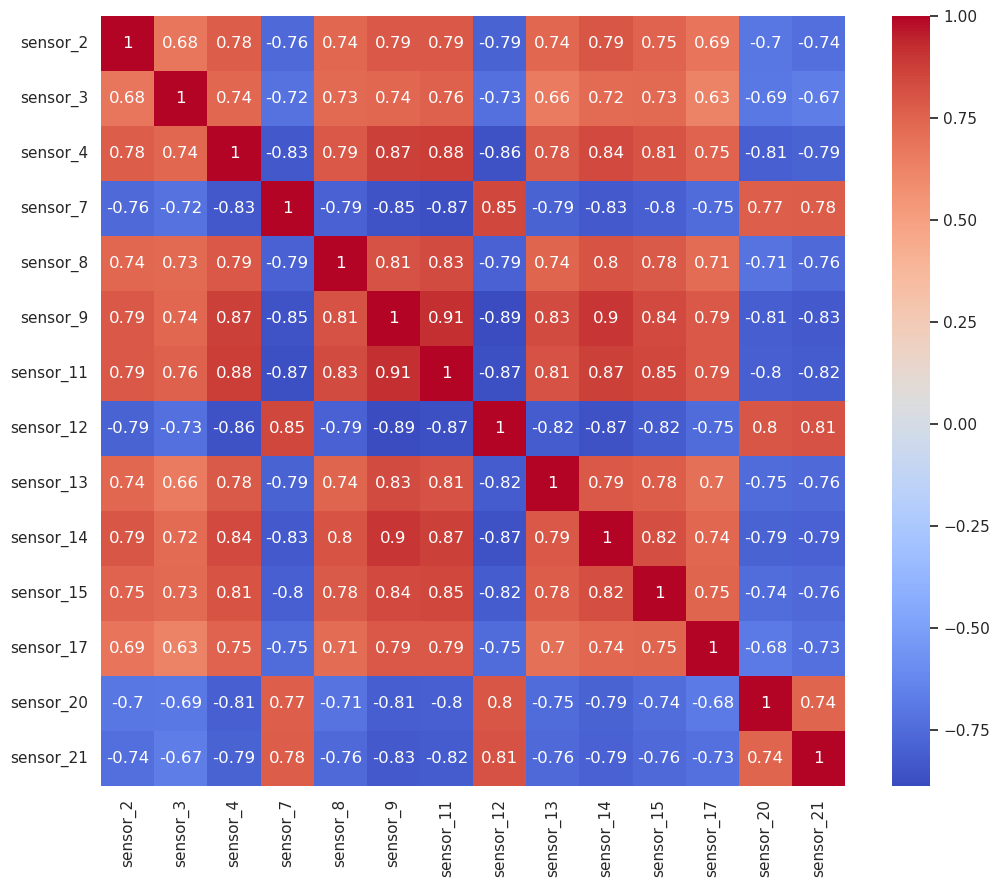

In [384]:
# Compare with single motor unit
plt.figure(figsize=(12,10))
unit_id = 2
unit_df = train_df[train_df['unit_number'] == unit_id]
# Calculate the correlation matrix for a single unit
corr_unit = unit_df[sensor_names].corr()
sns.heatmap(corr_unit,annot=True, cmap = 'coolwarm')
plt.show()

In [385]:
unit_df.corr()['RUL'].sort_values(ascending=False)

RUL            1.000000
sensor_12      0.825149
sensor_7       0.803818
sensor_21      0.779092
sensor_20      0.767857
setting_1      0.077614
setting_2      0.000566
sensor_17     -0.727412
sensor_3      -0.734746
sensor_8      -0.783505
sensor_2      -0.786519
sensor_14     -0.793333
sensor_13     -0.802666
sensor_15     -0.805365
sensor_4      -0.830417
sensor_9      -0.834042
sensor_11     -0.854874
cycle         -1.000000
unit_number         NaN
Name: RUL, dtype: float64

In [386]:
# Get the high correlation pairs
high_corr_pairs = get_high_correlation_pairs(corr_unit, threshold=0.8)

# Output the list of high correlation pairs
print("High correlation pairs (correlation > 0.8):")
for sensor1, sensor2, corr_value in high_corr_pairs:
    print(f"{sensor1} and {sensor2}: {corr_value:.2f}")

High correlation pairs (correlation > 0.8):
sensor_4 and sensor_7: -0.83
sensor_4 and sensor_9: 0.87
sensor_4 and sensor_11: 0.88
sensor_4 and sensor_12: -0.86
sensor_4 and sensor_14: 0.84
sensor_4 and sensor_15: 0.81
sensor_4 and sensor_20: -0.81
sensor_7 and sensor_9: -0.85
sensor_7 and sensor_11: -0.87
sensor_7 and sensor_12: 0.85
sensor_7 and sensor_14: -0.83
sensor_8 and sensor_9: 0.81
sensor_8 and sensor_11: 0.83
sensor_8 and sensor_14: 0.80
sensor_9 and sensor_11: 0.91
sensor_9 and sensor_12: -0.89
sensor_9 and sensor_13: 0.83
sensor_9 and sensor_14: 0.90
sensor_9 and sensor_15: 0.84
sensor_9 and sensor_20: -0.81
sensor_9 and sensor_21: -0.83
sensor_11 and sensor_12: -0.87
sensor_11 and sensor_13: 0.81
sensor_11 and sensor_14: 0.87
sensor_11 and sensor_15: 0.85
sensor_11 and sensor_20: -0.80
sensor_11 and sensor_21: -0.82
sensor_12 and sensor_13: -0.82
sensor_12 and sensor_14: -0.87
sensor_12 and sensor_15: -0.82
sensor_12 and sensor_21: 0.81
sensor_14 and sensor_15: 0.82


The pairwise correlation of different sensors seems to be different when looking at different motor units

# 4. Data Visualization

In [387]:
def plot_features(feature_name):
    plt.figure(figsize=(13,5))
    for i in train_df['unit_number'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_number
            plt.plot('RUL', feature_name, 
                     data=train_df[train_df['unit_number']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(feature_name)
    plt.xlabel('RUL')

    
    plt.show()

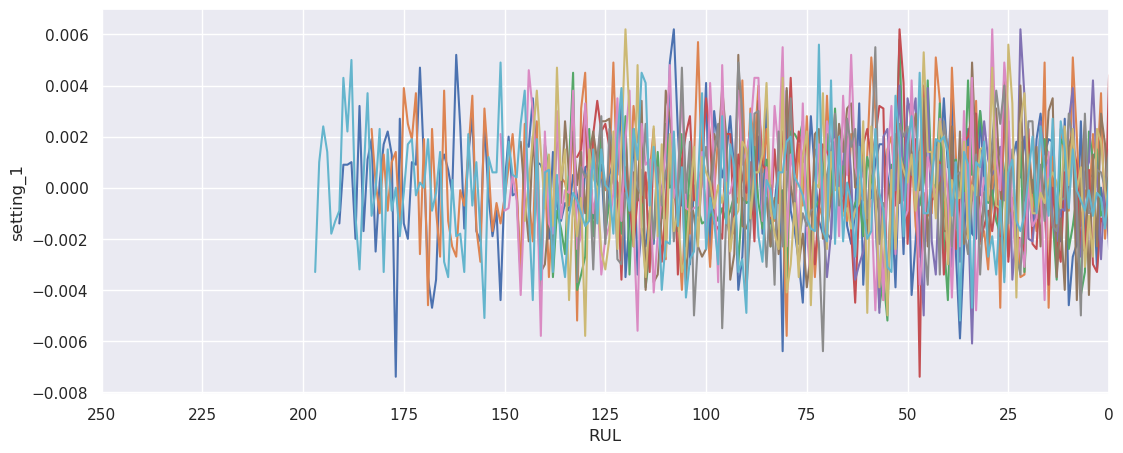

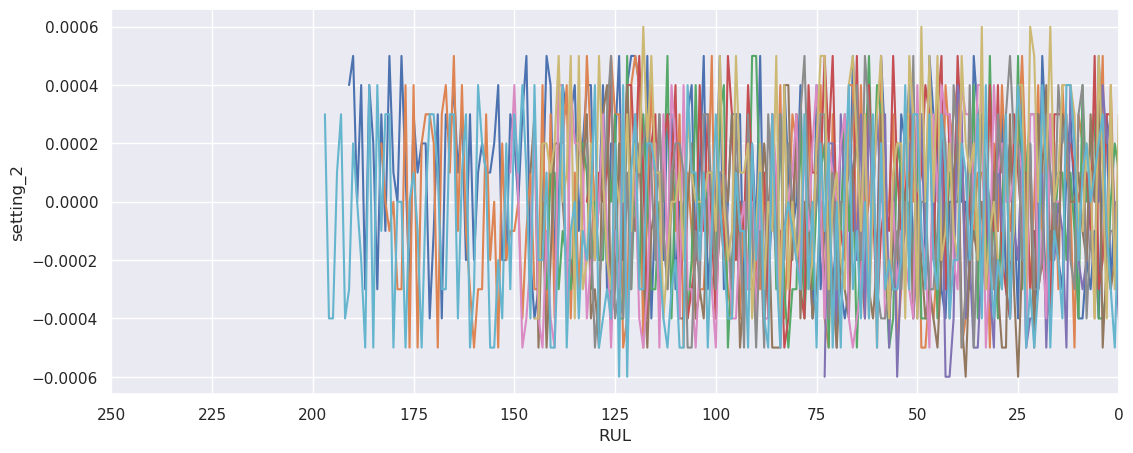

In [388]:
plot_features('setting_1')
plot_features('setting_2')


The sensor settings show no trend  but seem to flucutate between  the same a minimum and maximum value for all units, maybe due to noise.

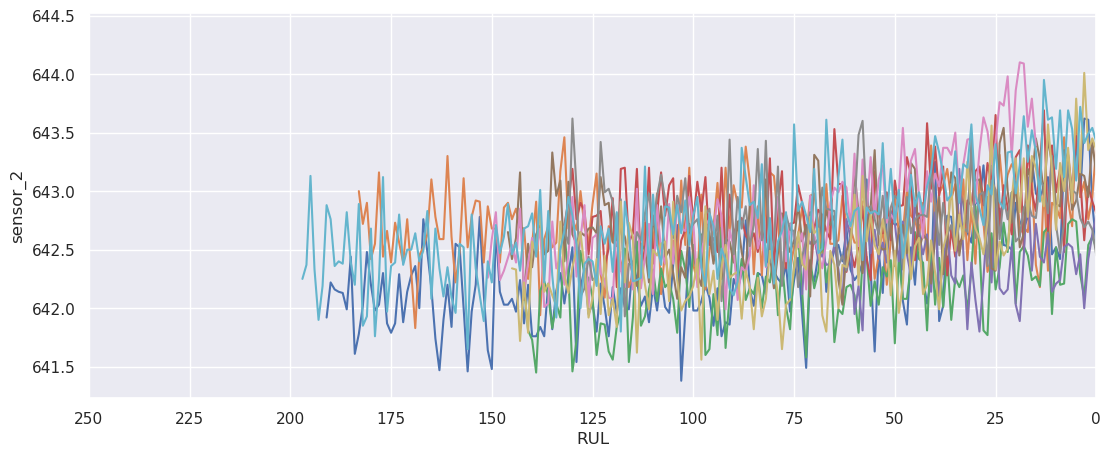

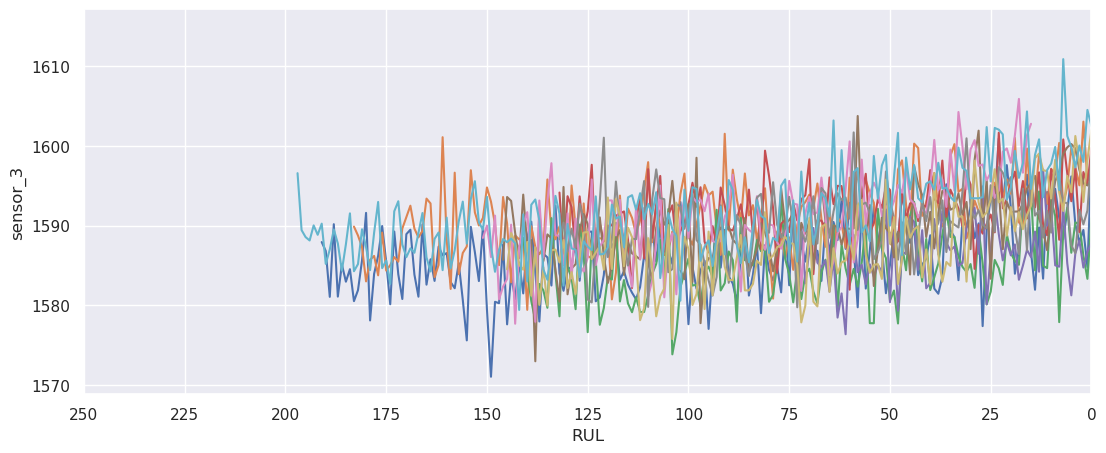

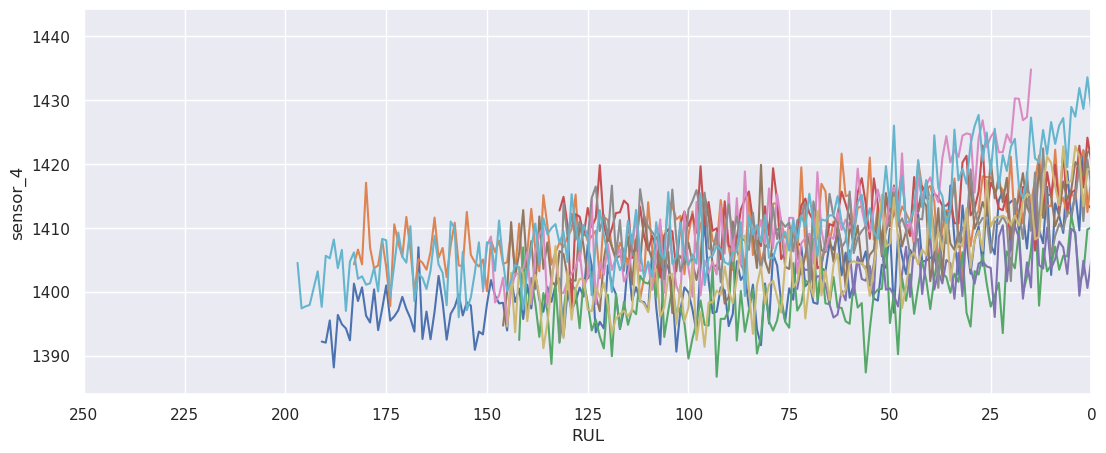

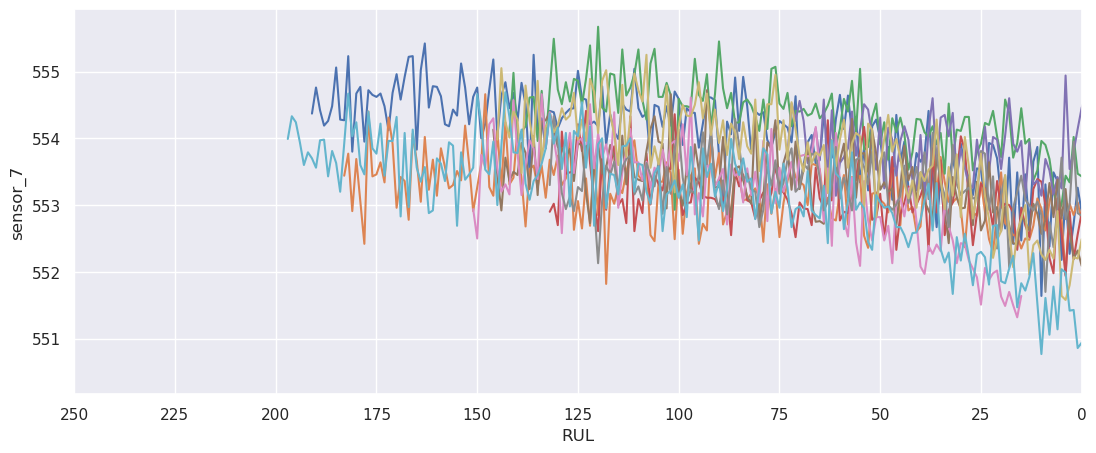

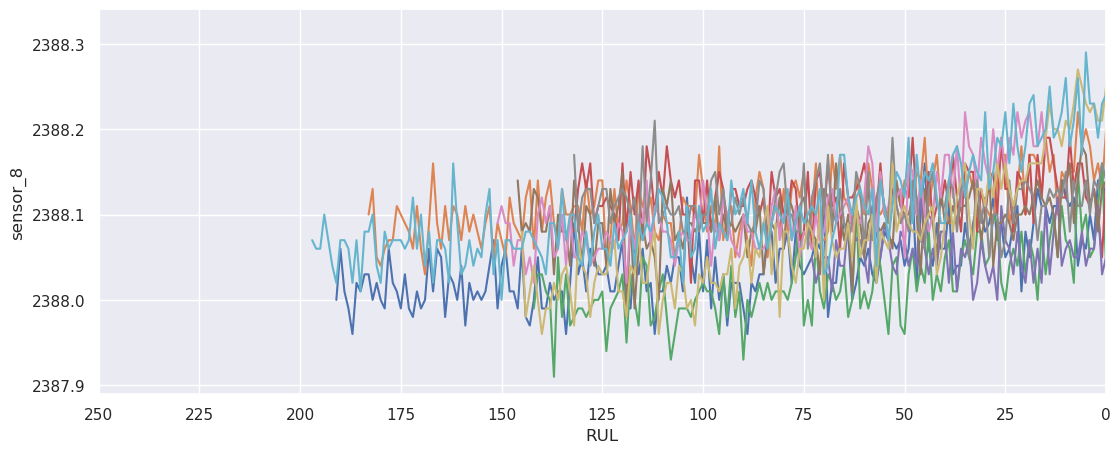

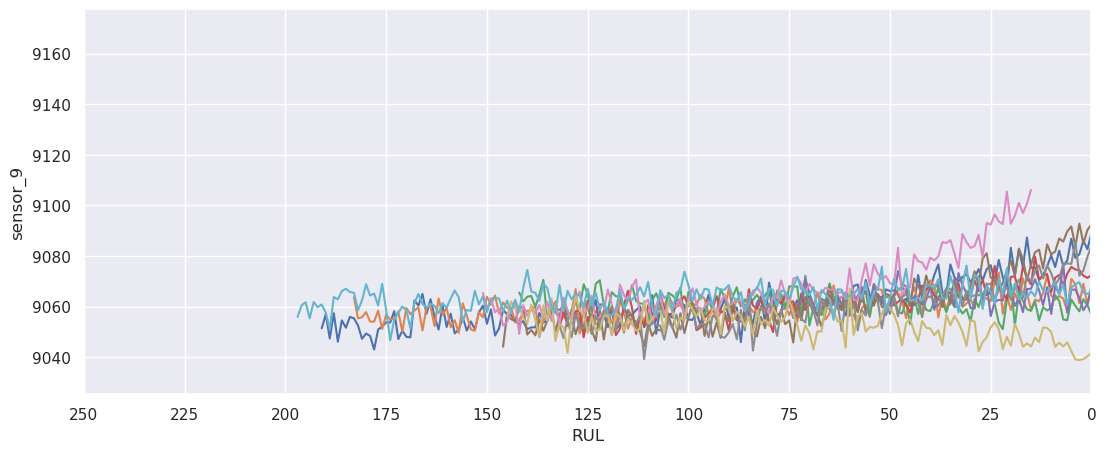

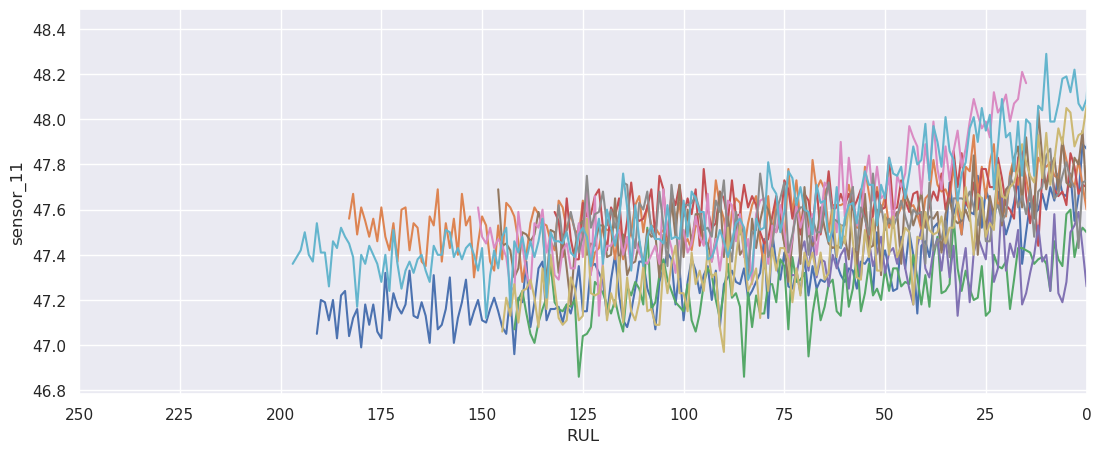

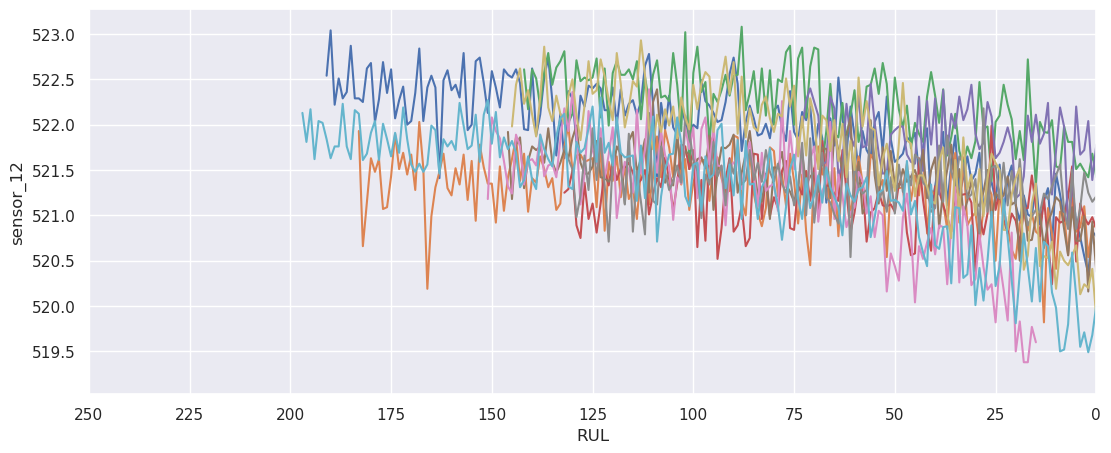

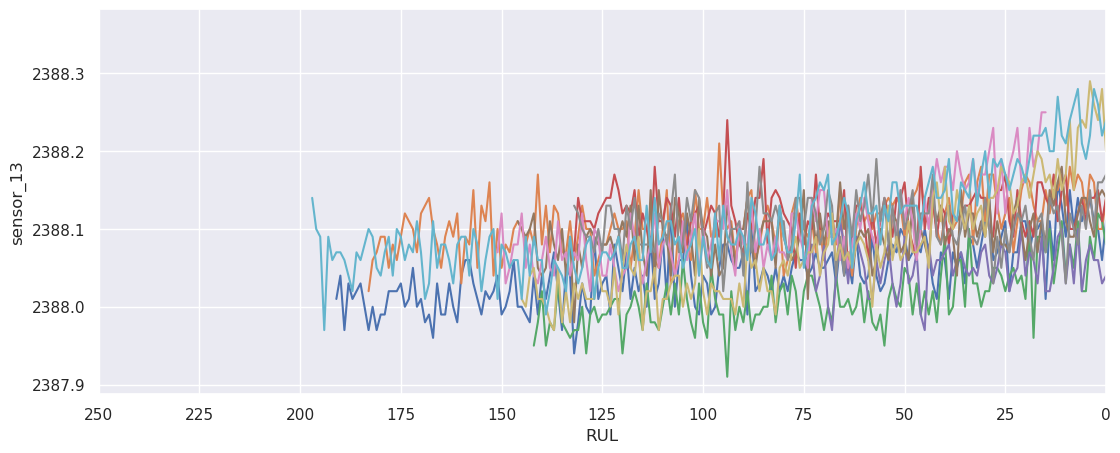

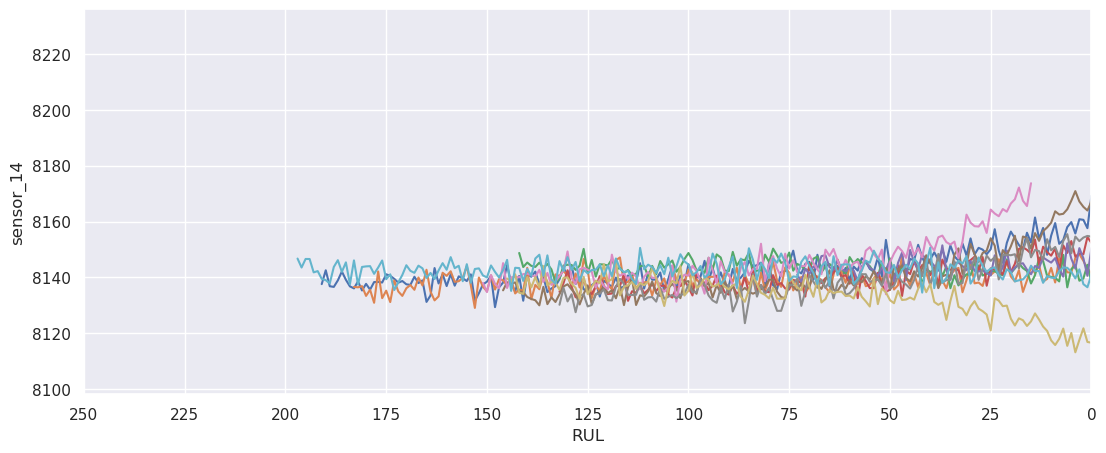

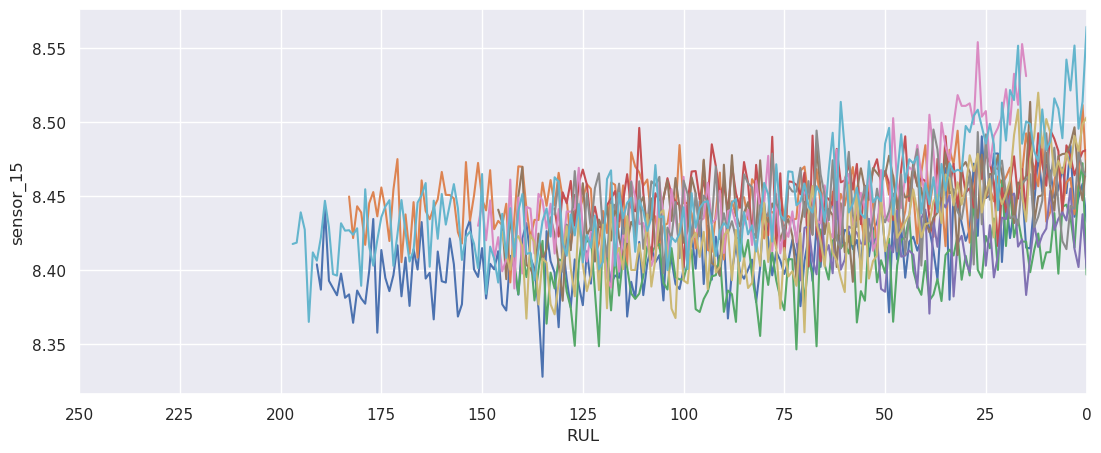

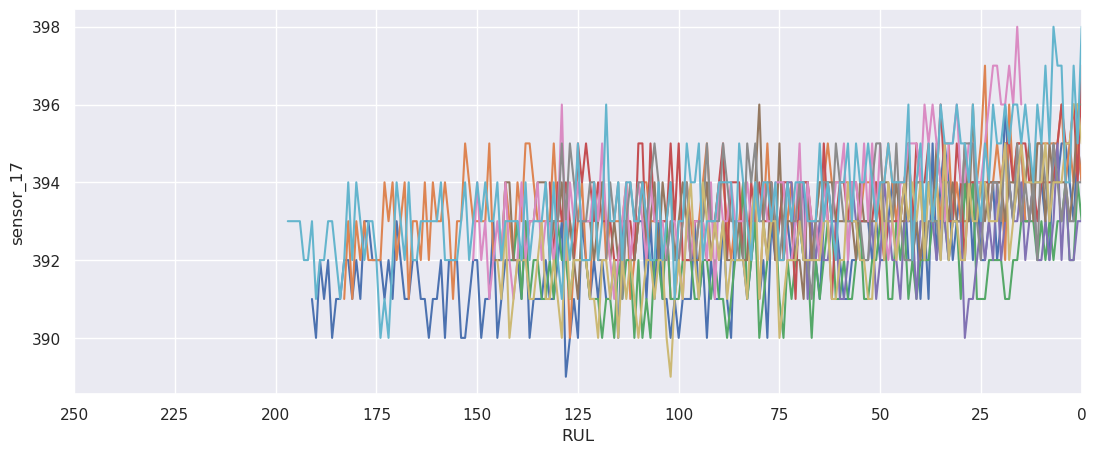

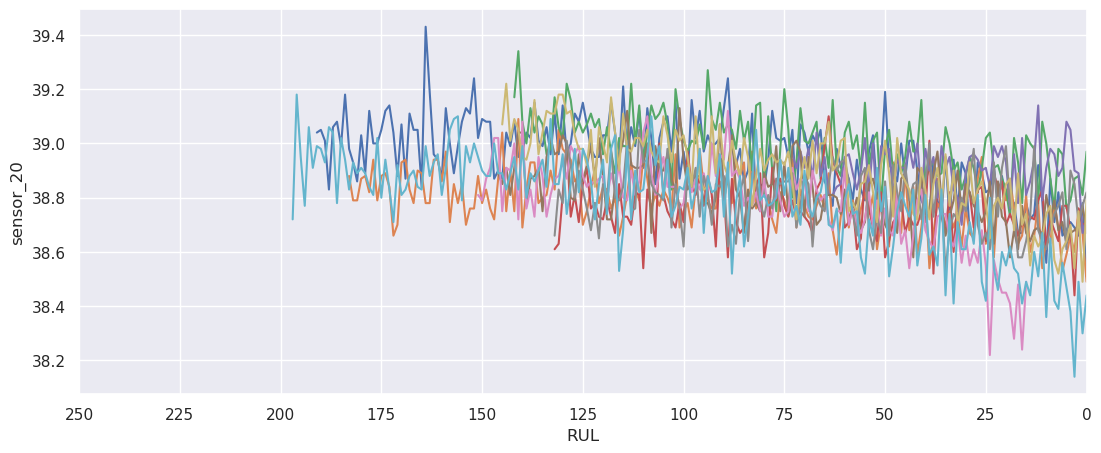

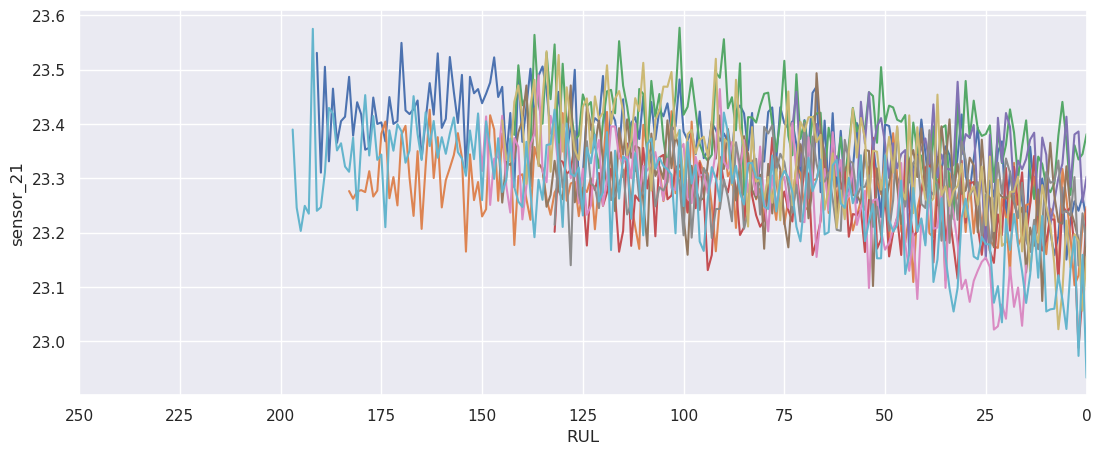

In [389]:
for sensor_name in sensor_names:
        plot_features(sensor_name)

The minimum max_cycle (operating time) is 128. When passing this threshold, the sensor show a strong trend toward end of lifetime and therefore a correlation to RUL.
Mostly it's either an increasing or decreasing trends. For sensor_14 and sensor_9 the type  and strength of trend depends on the motor unit. Notable is that they also had the highest pairwise correlation. Removing variables that do now show a single trend (sensor_14, sensor_9 and settings) could therefore be considered as candidates for removal.

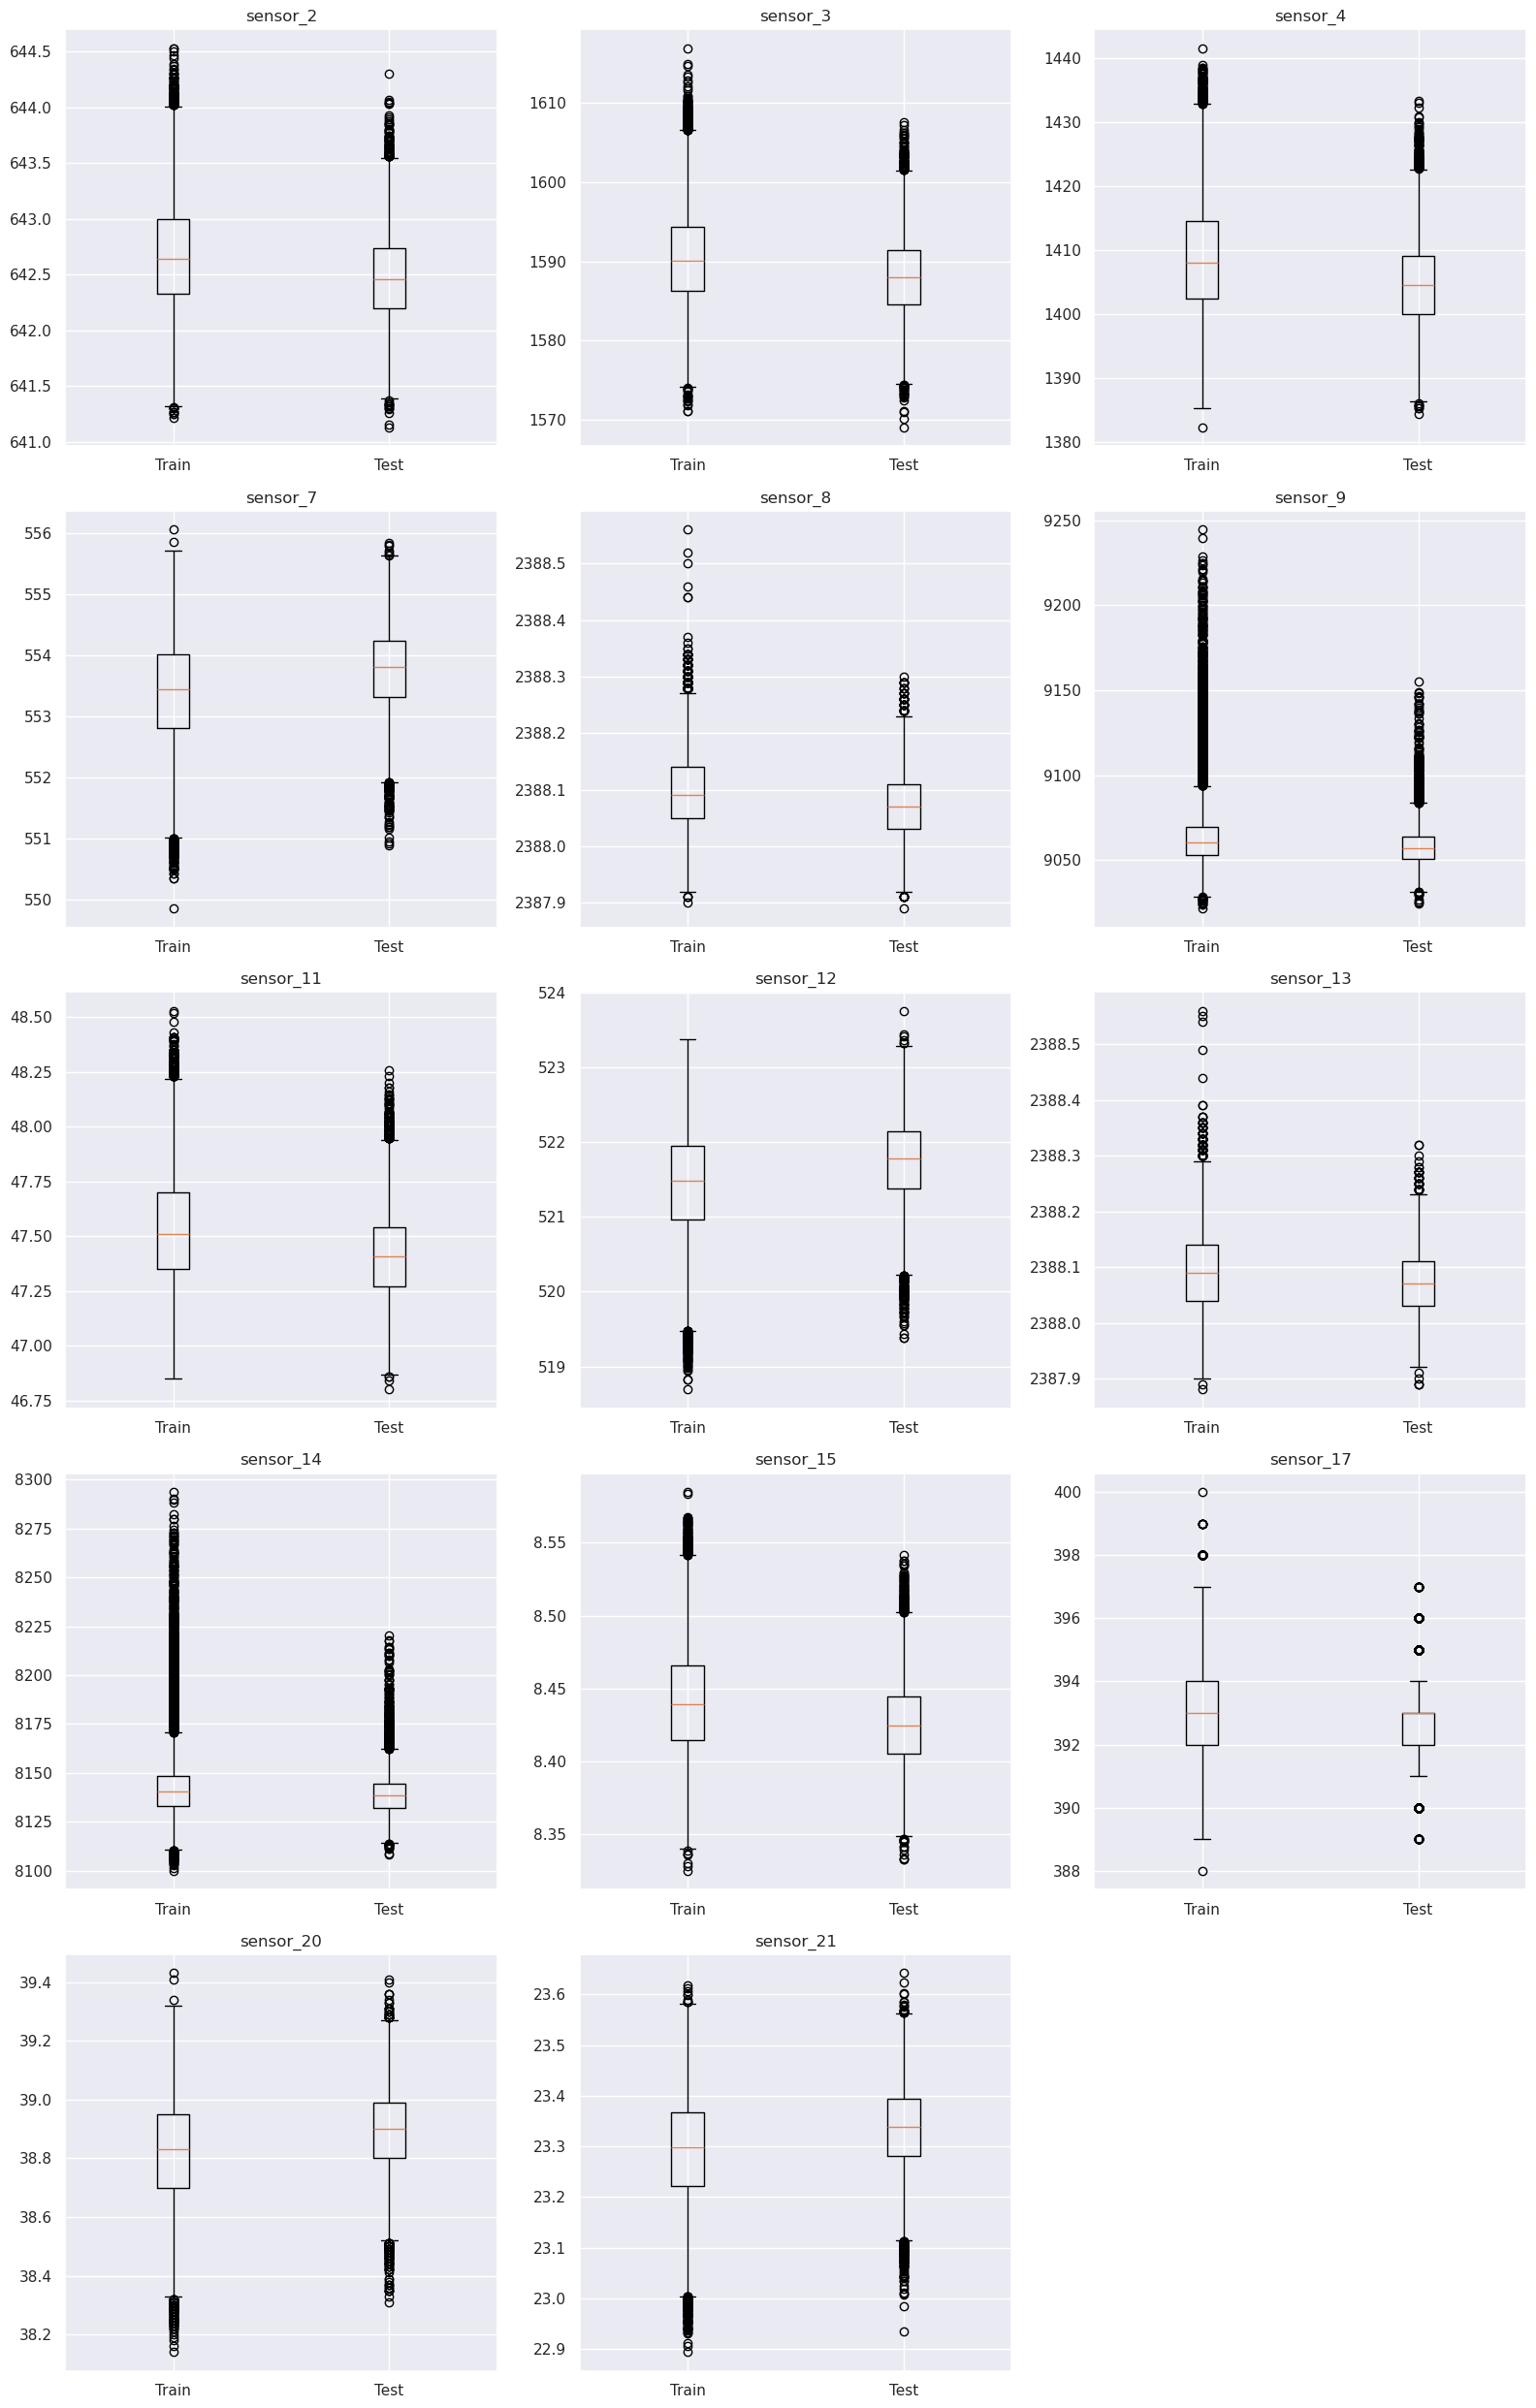

In [390]:
import matplotlib.pyplot as plt

# Calculate the number of rows needed
num_rows = len(sensor_names) // 3
if len(sensor_names) % 3 != 0:
    num_rows += 1

fig, axes = plt.subplots(num_rows, 3, figsize=(16, 5 * num_rows))
axes = axes.flatten()

# Plot each sensor's boxplot for both train and test datasets
for i, sensor in enumerate(sensor_names):
    ax = axes[i]
    ax.boxplot([train_df[sensor], test_df[sensor]], labels=['Train', 'Test'])
    ax.set_title(sensor)
    ax.set_xticklabels(['Train', 'Test'])

# Hide empty subplots
for i in range(len(sensor_names), num_rows * 3):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

The box plots and signal curve plots show that there are many outliers and the data is not well distributed. Therefore, scaling might be required.

# 5.  Stationarity 

Stationarity means that statistical features such as mean, variance, and correlation remain consistent over time and are not time-dependent. Some models assume stationarity of data, therefore it is important to check stationarity. This  involves examining trends, seasonality, and other patterns in the time series data. This can be done e.g. by examining the plots.
- Trends: increasing or decreasing values
- seasonality: repeating short-term cycle

Another way to stastically test is the Augmented Dickey-Fuller test which is called a unit root test.
- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

https://himani-gulati.medium.com/time-series-analysis-data-exploration-and-visualization-9dbede5cbb8d

If data is found to be non-stationary, it may require preprocessing steps such as differencing or detrending to achieve stationarity.  This ensures that the time series data is in a suitable form for accurate autocorrelation assessment. Also some models assume stationarity in data (e.g. ARIMA, SARIMA) while others don't require stationarity (e.g. Random Forest, Regression, Gradient Boost, and Neural Networks.
- Differencing: Subtracting the previous value from the current value to remove trends.
- Detrending: Removing trends using regression techniques.

**However, for predicting  the RUL the trend is a key feature, so differencing removes essential information.**

## 5.1 ADF test

In [391]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'train_df' contains your DataFrame
# Replace 'train_df' with your actual DataFrame

# Create an empty DataFrame to store ADF test results
adf_results = None

# Group data by 'unit_number'
grouped = train_df.groupby('unit_number')

# Iterate over each group (unit)
for unit, data in grouped:
    # Iterate over each sensor column
    for sensor_col in sensor_names: 
        # Perform ADF test for the sensor time series
        adf_statistic, p_value, _, _, critical_values, _ = adfuller(data[sensor_col])
        # Store ADF test results in the DataFrame
        new_df = pd.DataFrame({'Unit': unit, 'Sensor': sensor_col,  'ADF Statistic':  adf_statistic, 'p-value': p_value,  'Critical Value 1%': critical_values['1%'],  'Critical Value 5%': critical_values['5%'],  'Critical Value 10%': critical_values['10%'] }, index=[0]) 
        adf_results = new_df if adf_results is None else pd.concat([adf_results, new_df], ignore_index=True)

# Print or display the DataFrame
adf_results

Unit     Sensor  ADF Statistic       p-value  Critical Value 1%  \
0        1   sensor_2       0.402073  9.815723e-01          -3.466598   
1        1   sensor_3       0.517922  9.854078e-01          -3.467420   
2        1   sensor_4       0.726047  9.903436e-01          -3.466201   
3        1   sensor_7       1.844073  9.984325e-01          -3.467845   
4        1   sensor_8       2.798889  1.000000e+00          -3.467211   
...    ...        ...            ...           ...                ...   
1395   100  sensor_14     -14.284543  1.306691e-26          -3.463645   
1396   100  sensor_15       0.642744  9.886232e-01          -3.465244   
1397   100  sensor_17       0.326957  9.785480e-01          -3.465812   
1398   100  sensor_20       0.593698  9.874593e-01          -3.464694   
1399   100  sensor_21       0.955283  9.937710e-01          -3.465244   

      Critical Value 5%  Critical Value 10%  
0             -2.877467           -2.575260  
1             -2.877826           -2.575452  
2             -2.877293           -2.575168  
3             -2.878012           -2.575551  
4             -2.877735           -2.575403  
...                 ...                 ...  
1395          -2.876176           -2.574572  
1396          -2.876875           -2.574945  
1397          -2.877123           -2.575077  
1398          -2.876635           -2.574816  
1399          -2.876875           -2.574945  

[1400 rows x 7 columns]

In [392]:
(adf_results['p-value'] <= 0.05).sum()

46

46 of 1400 time series are stationary, so most of them are non-stationary.

## 5.2 Differencing
Just for test purposes. Probably, as said before, it's not useful to remove the trend for predicting RUL.

In [393]:
for sensor in sensor_names:
    train_df[sensor + '_diff'] = train_df[sensor] - train_df[sensor].shift(1) # same as train_df[sensor + '_diff'] = train_df[sensor].diff()?
train_df.dropna(inplace=True)  # Drop NaN values introduced by differencing
train_df.head()

unit_number  cycle  setting_1  setting_2  sensor_2  sensor_3  sensor_4  \
1            1      2     0.0019    -0.0003    642.15   1591.82   1403.14   
2            1      3    -0.0043     0.0003    642.35   1587.99   1404.20   
3            1      4     0.0007     0.0000    642.35   1582.79   1401.87   
4            1      5    -0.0019    -0.0002    642.37   1582.85   1406.22   
5            1      6    -0.0043    -0.0001    642.10   1584.47   1398.37   

   sensor_7  sensor_8  sensor_9  sensor_11  sensor_12  sensor_13  sensor_14  \
1    553.75   2388.04   9044.07      47.49     522.28    2388.07    8131.49   
2    554.26   2388.08   9052.94      47.27     522.42    2388.03    8133.23   
3    554.45   2388.11   9049.48      47.13     522.86    2388.08    8133.83   
4    554.00   2388.06   9055.15      47.28     522.19    2388.04    8133.80   
5    554.67   2388.02   9049.68      47.16     521.68    2388.03    8132.85   

   sensor_15  sensor_17  sensor_20  sensor_21  RUL  sensor_2_diff  \
1     8.4318        392      39.00    23.4236   29           0.33   
2     8.4178        390      38.95    23.3442   28           0.20   
3     8.3682        392      38.88    23.3739   27           0.00   
4     8.4294        393      38.90    23.4044   26           0.02   
5     8.4108        391      38.98    23.3669   25          -0.27   

   sensor_3_diff  sensor_4_diff  sensor_7_diff  sensor_8_diff  sensor_9_diff  \
1           2.12           2.54          -0.61          -0.02          -2.12   
2          -3.83           1.06           0.51           0.04           8.87   
3          -5.20          -2.33           0.19           0.03          -3.46   
4           0.06           4.35          -0.45          -0.05           5.67   
5           1.62          -7.85           0.67          -0.04          -5.47   

   sensor_11_diff  sensor_12_diff  sensor_13_diff  sensor_14_diff  \
1            0.02            0.62            0.05           -7.13   
2           -0.22            0.14           -0.04            1.74   
3           -0.14            0.44            0.05            0.60   
4            0.15           -0.67           -0.04           -0.03   
5           -0.12           -0.51           -0.01           -0.95   

   sensor_15_diff  sensor_17_diff  sensor_20_diff  sensor_21_diff  
1          0.0123             0.0           -0.06          0.0046  
2         -0.0140            -2.0           -0.05         -0.0794  
3         -0.0496             2.0           -0.07          0.0297  
4          0.0612             1.0            0.02          0.0305  
5         -0.0186            -2.0            0.08         -0.0375

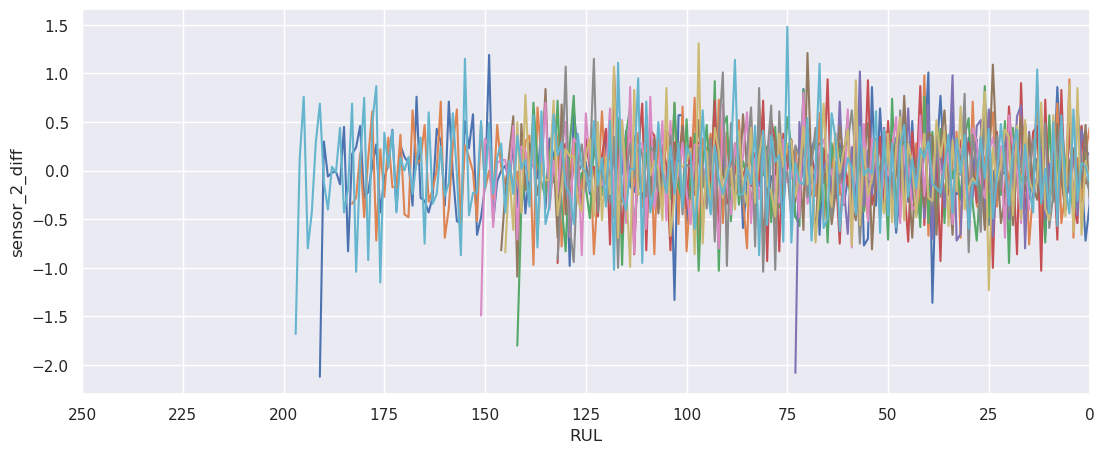

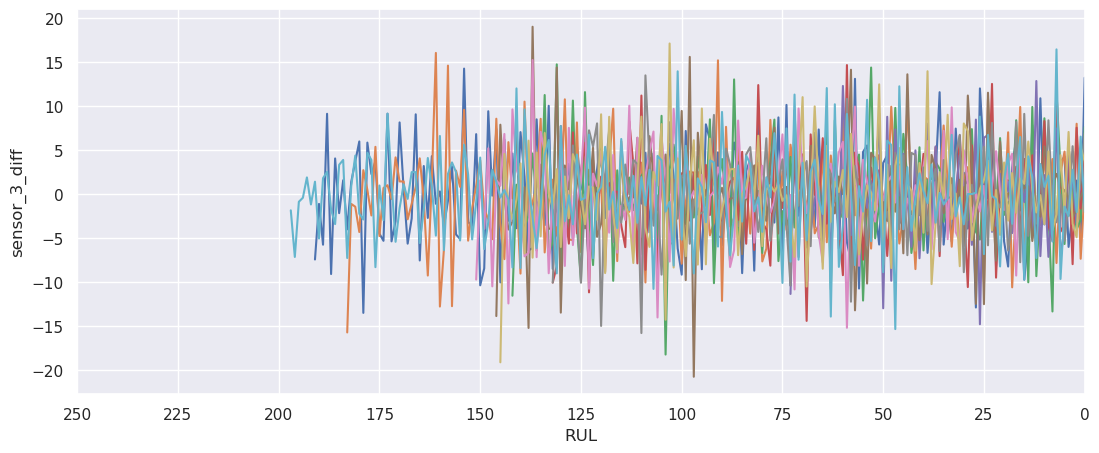

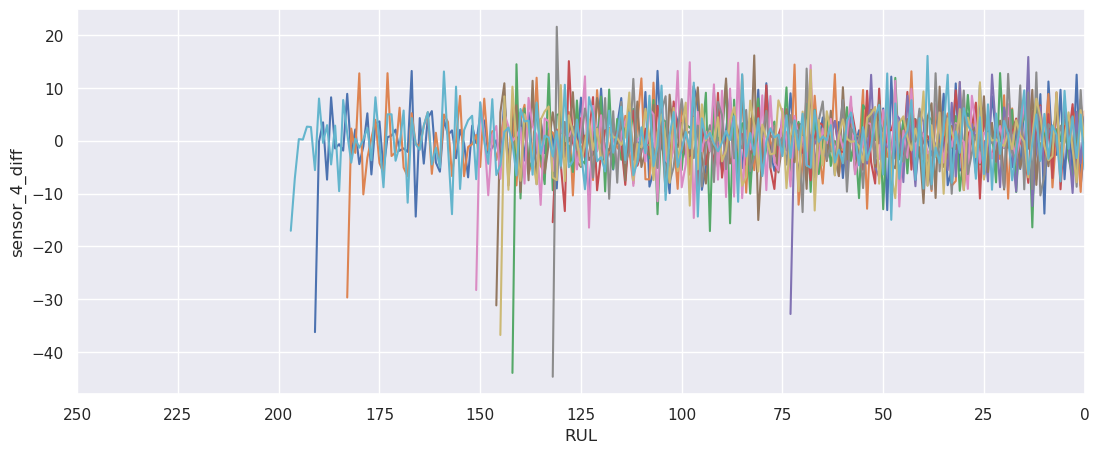

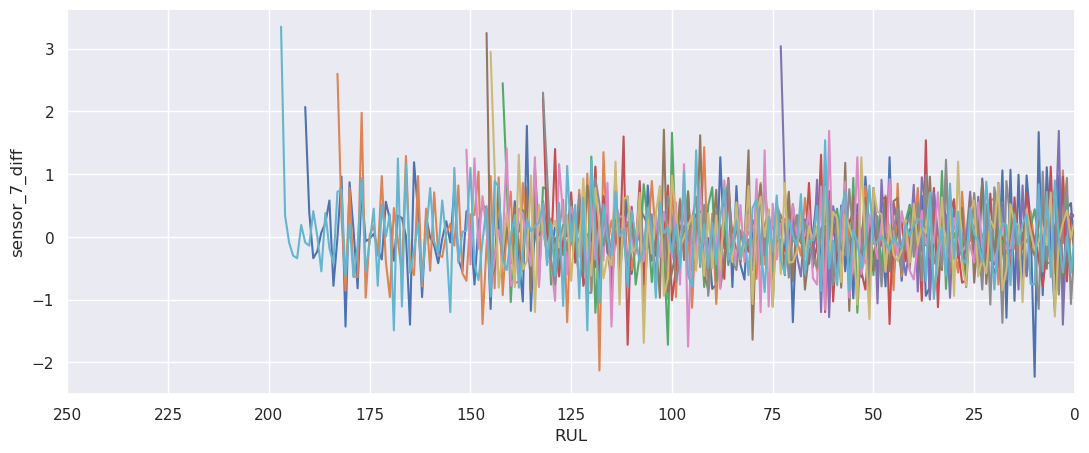

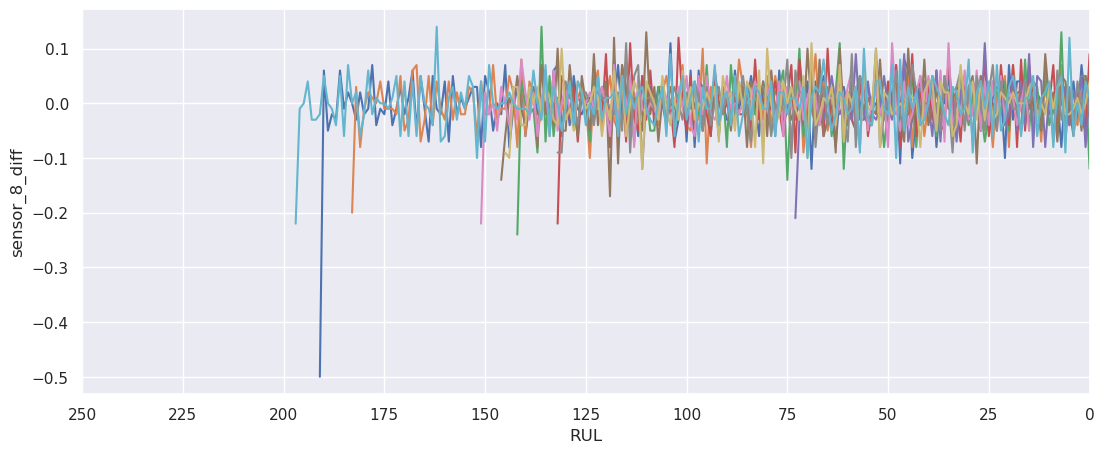

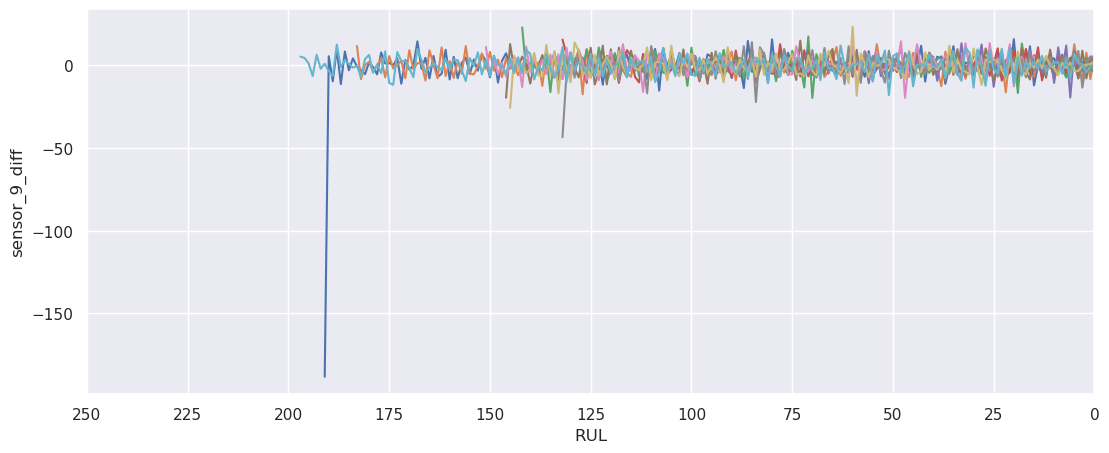

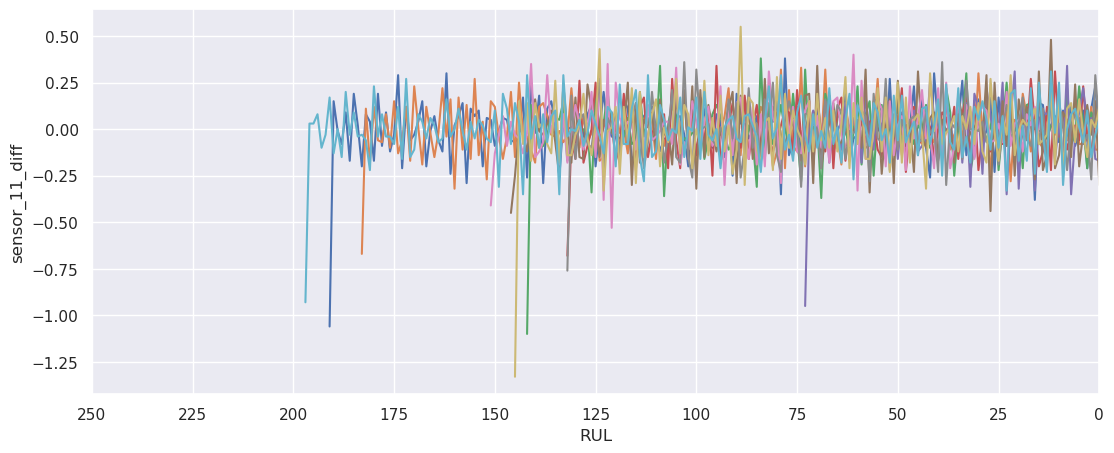

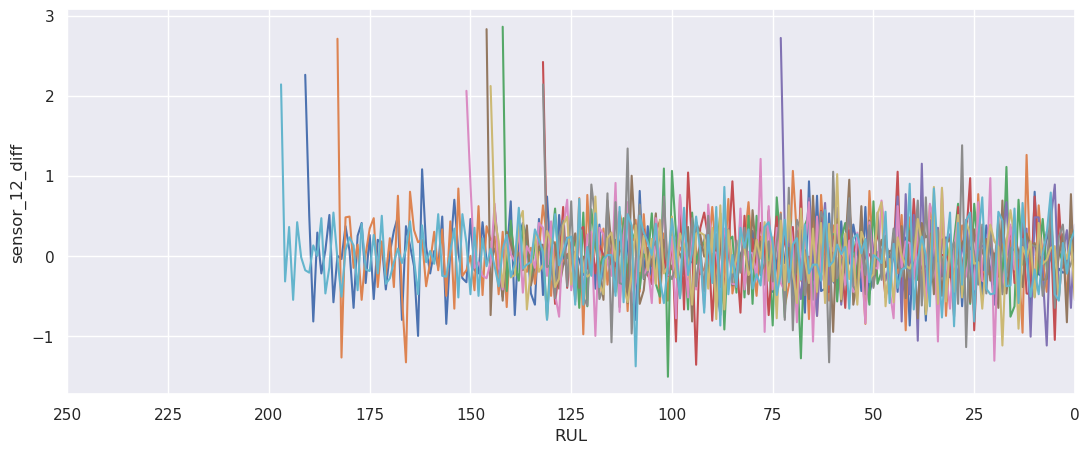

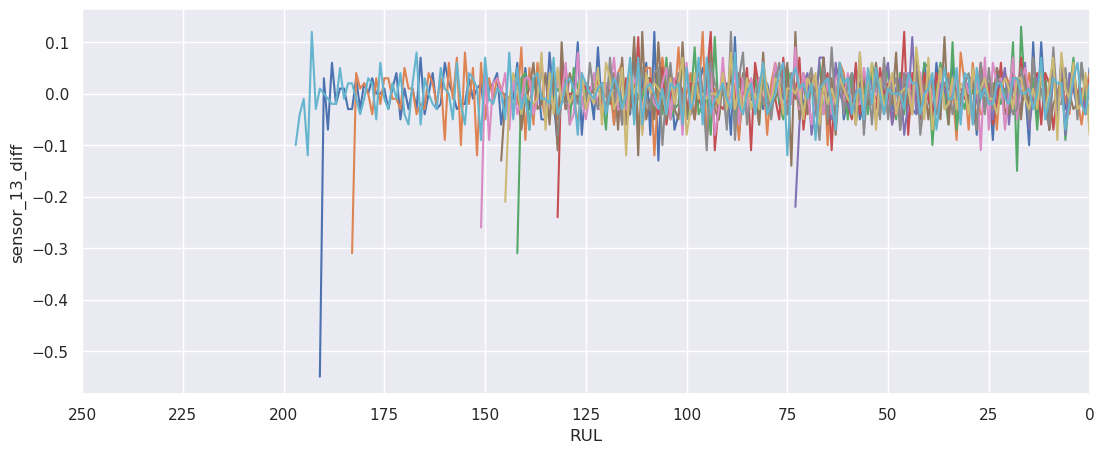

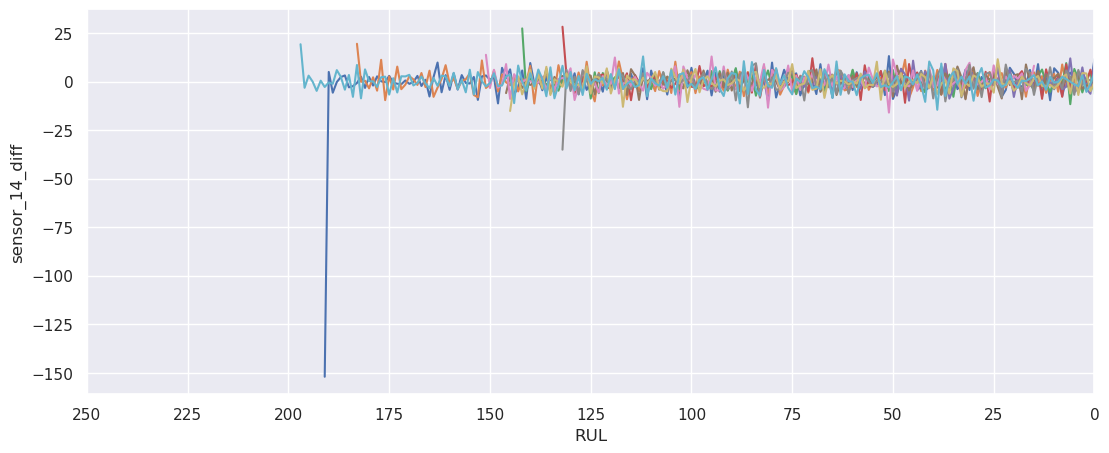

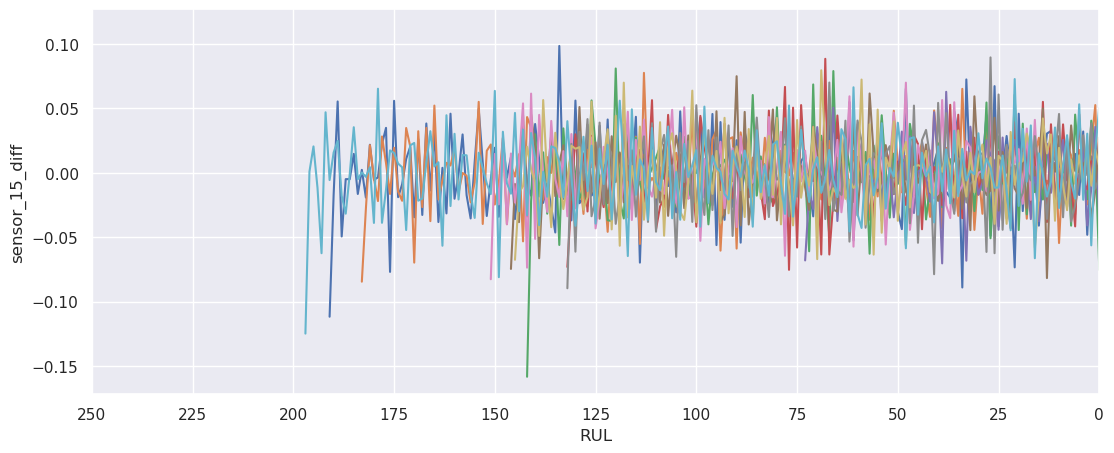

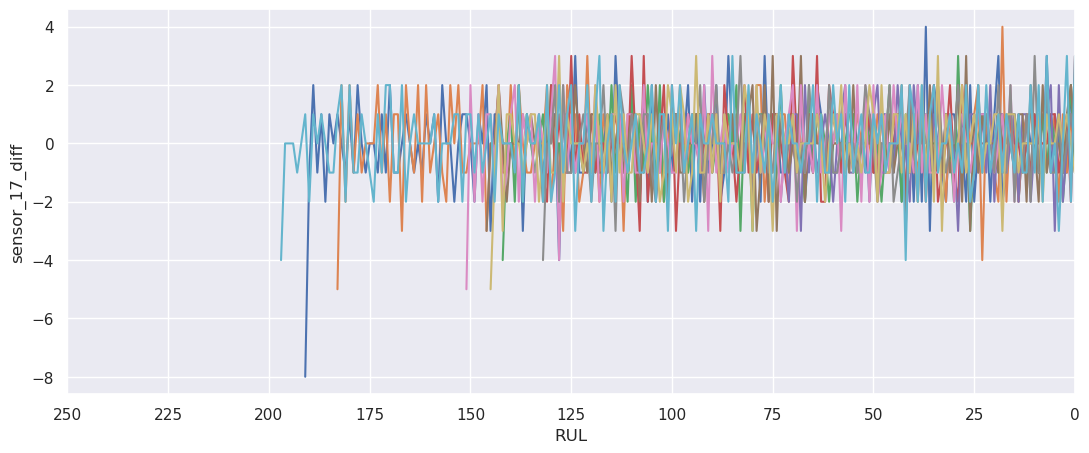

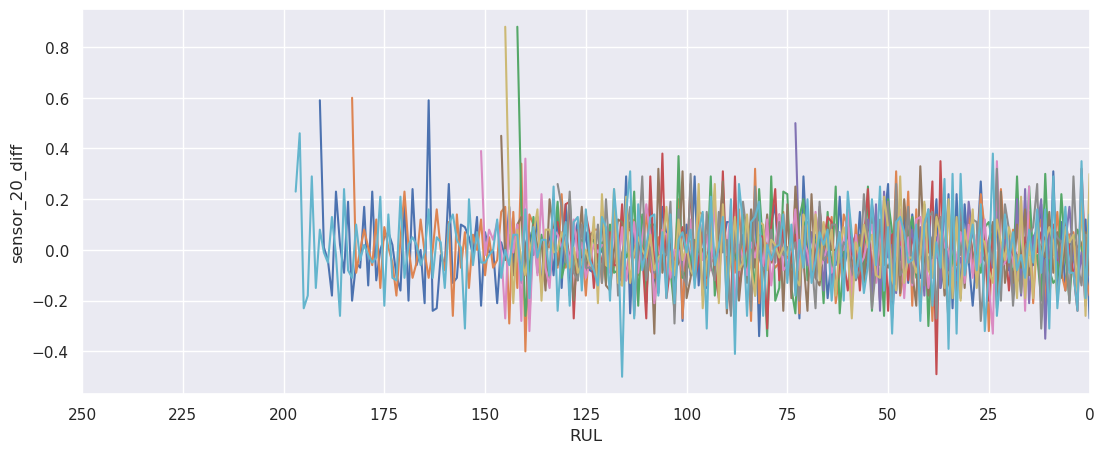

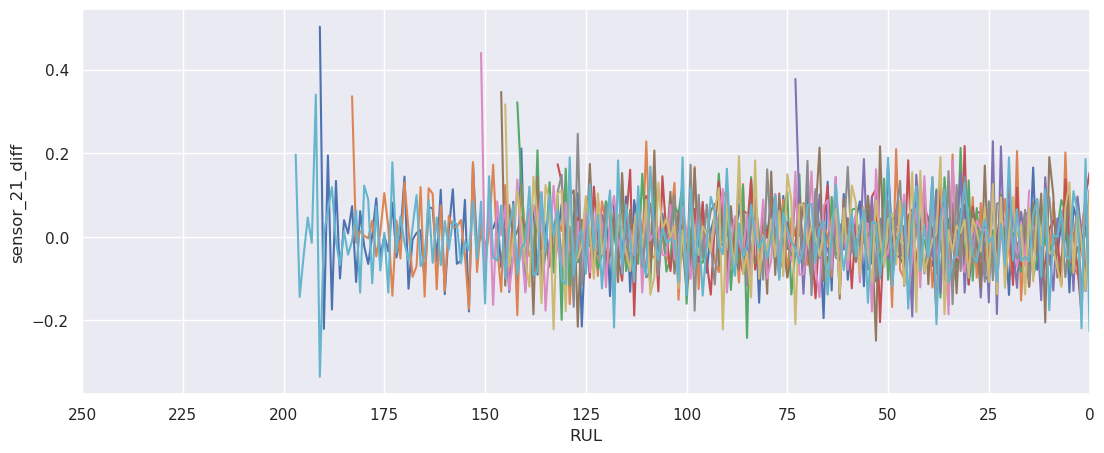

In [394]:
for sensor_name in sensor_names:
        plot_features(sensor_name + '_diff')

# 6. Autocorrelation
Auto-correlation measures the correlation between a time series and its lagged values (previous time steps), revealing how each observation in the series is related to its past observation.
Partial Autocorellation  measures the correlation between a time series and specific lagged values without taking effect of intermediate lags into account.
Both provide insights into the underlying structure of the data and help identify potential patterns and relationships, which helps to select the right model.
between an observation and its previous observations at a specific lag, excluding the contributions from intermediate lags.
In the plots the spikes indicate the degree of correlation between the time series and its lagged values
- Look for significant spikes outside the blue confidence intervals (autocorrelation is unlikely to be due to random noise)
- ACF plot: identify patterns (slow decay suggests non-stationarity, cutoff suggests stationarity)
- PACF plot:  cut-off pattern can help determine the order of an autoregressive (AR) process (sharp cut-off after lag p suggests an AR(p) process)

Autocorellation and Partial Correlation for sensors of motor unit  40


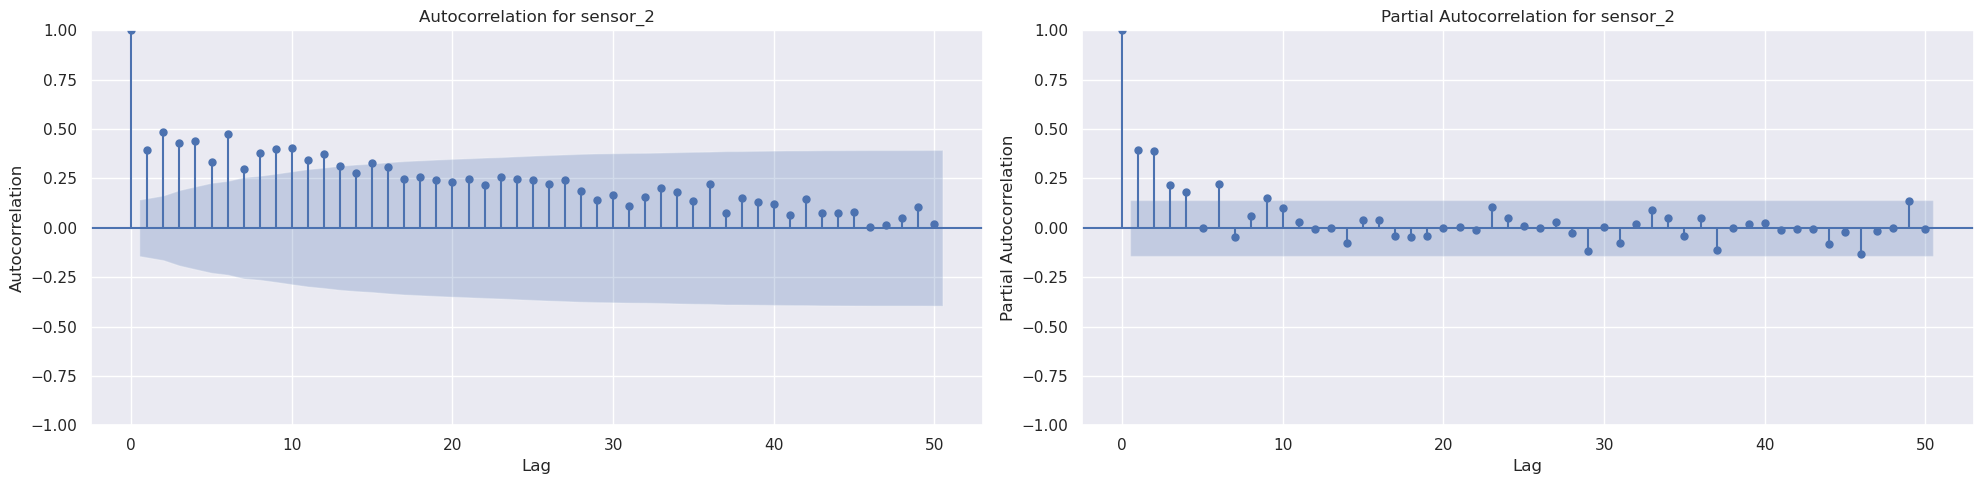

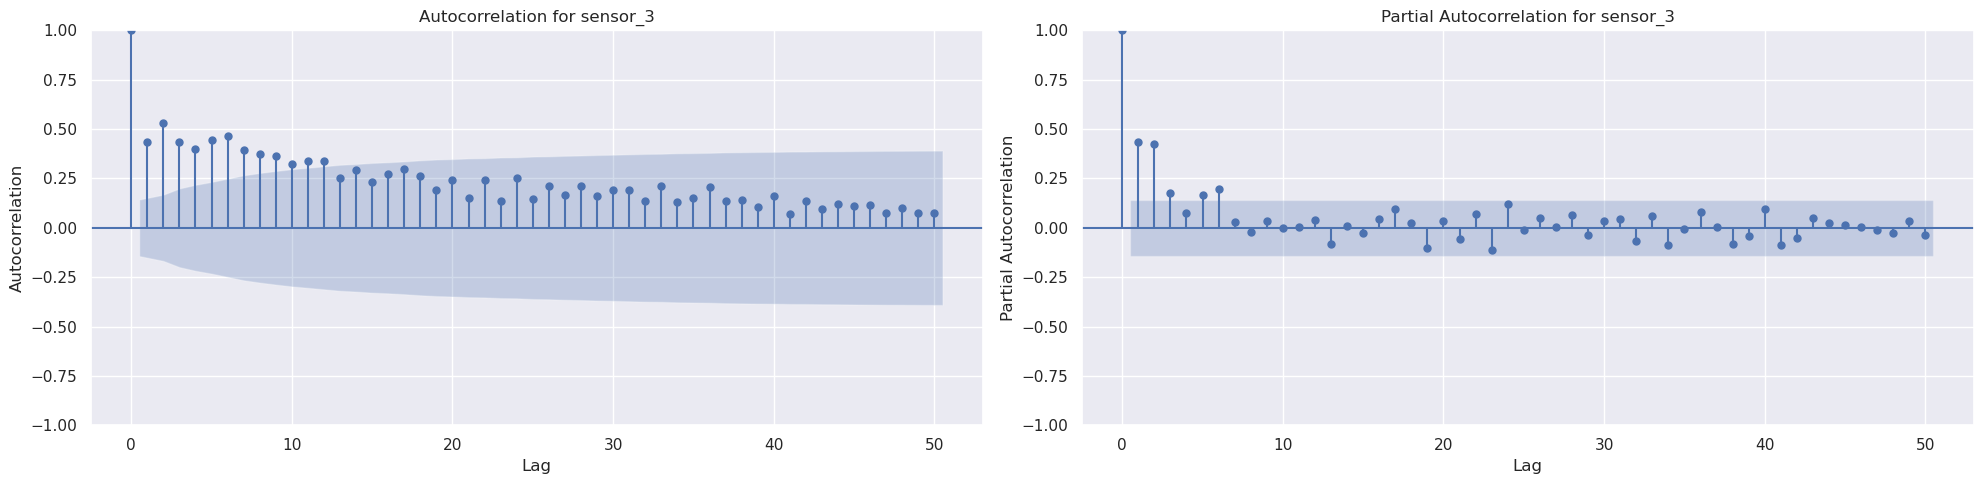

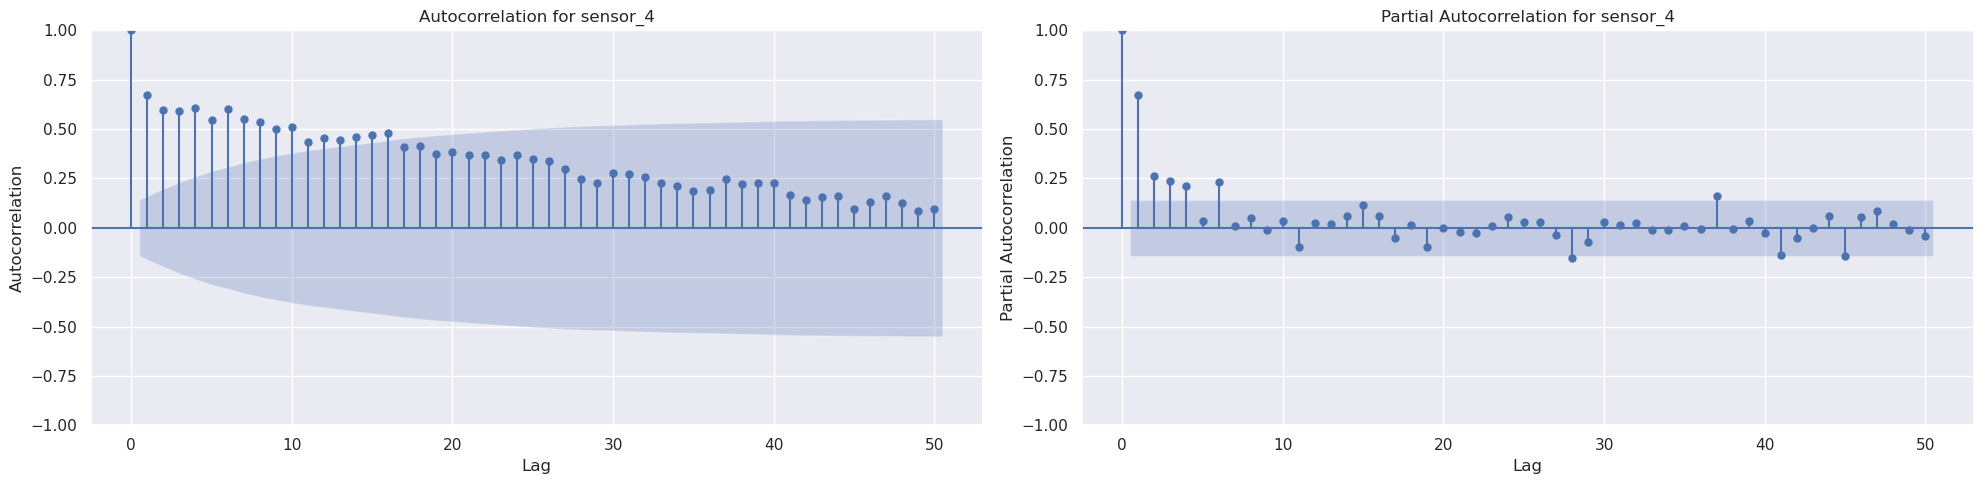

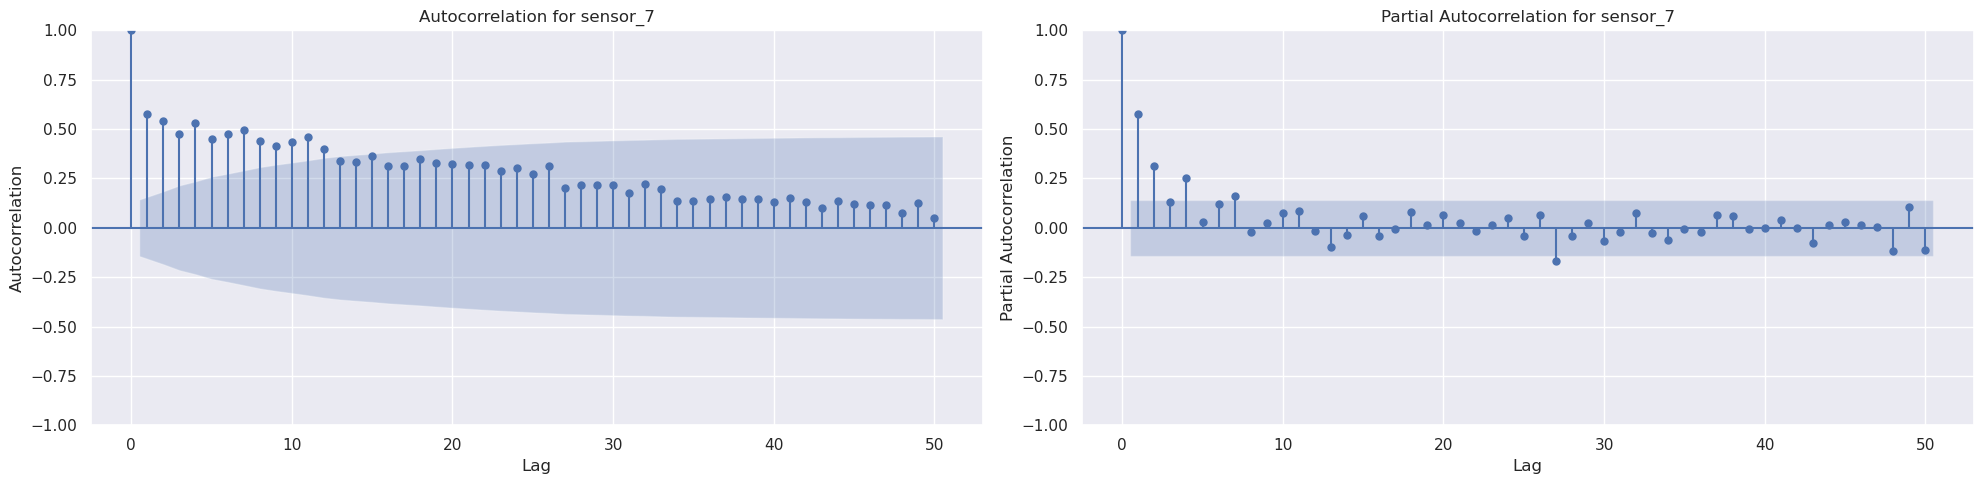

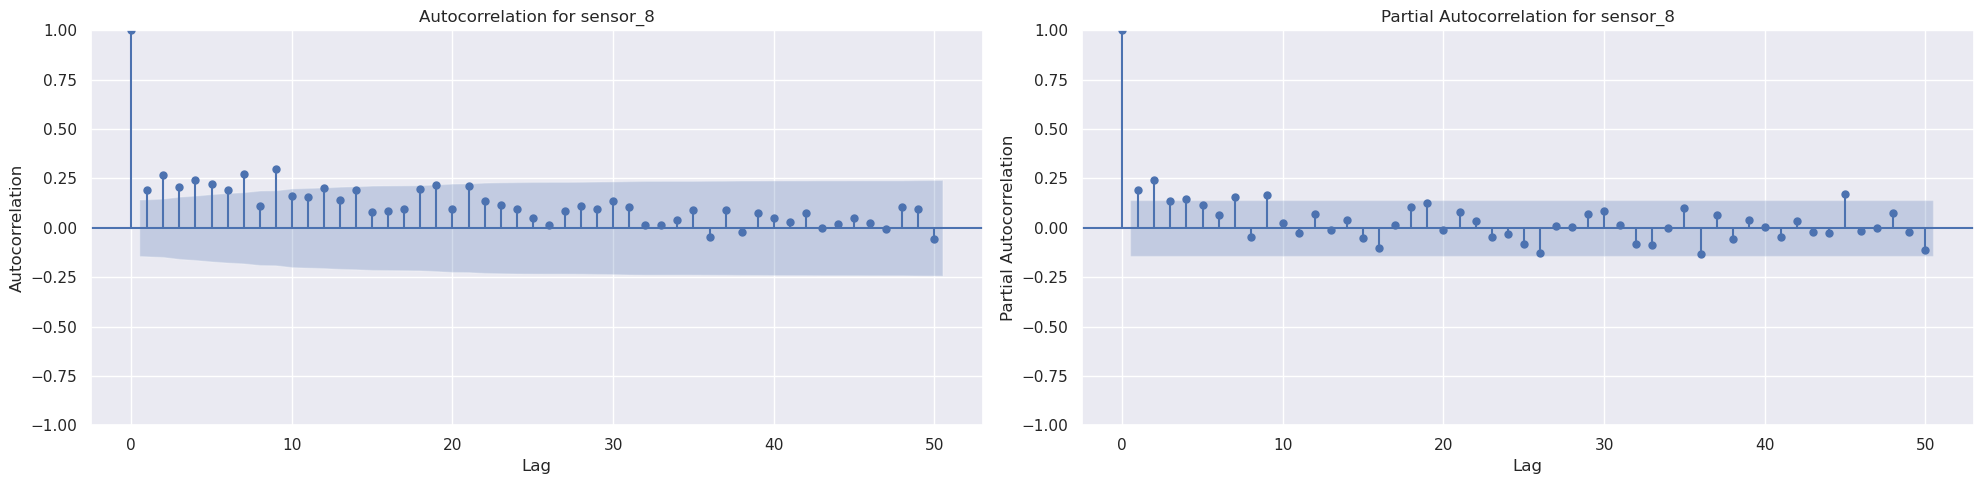

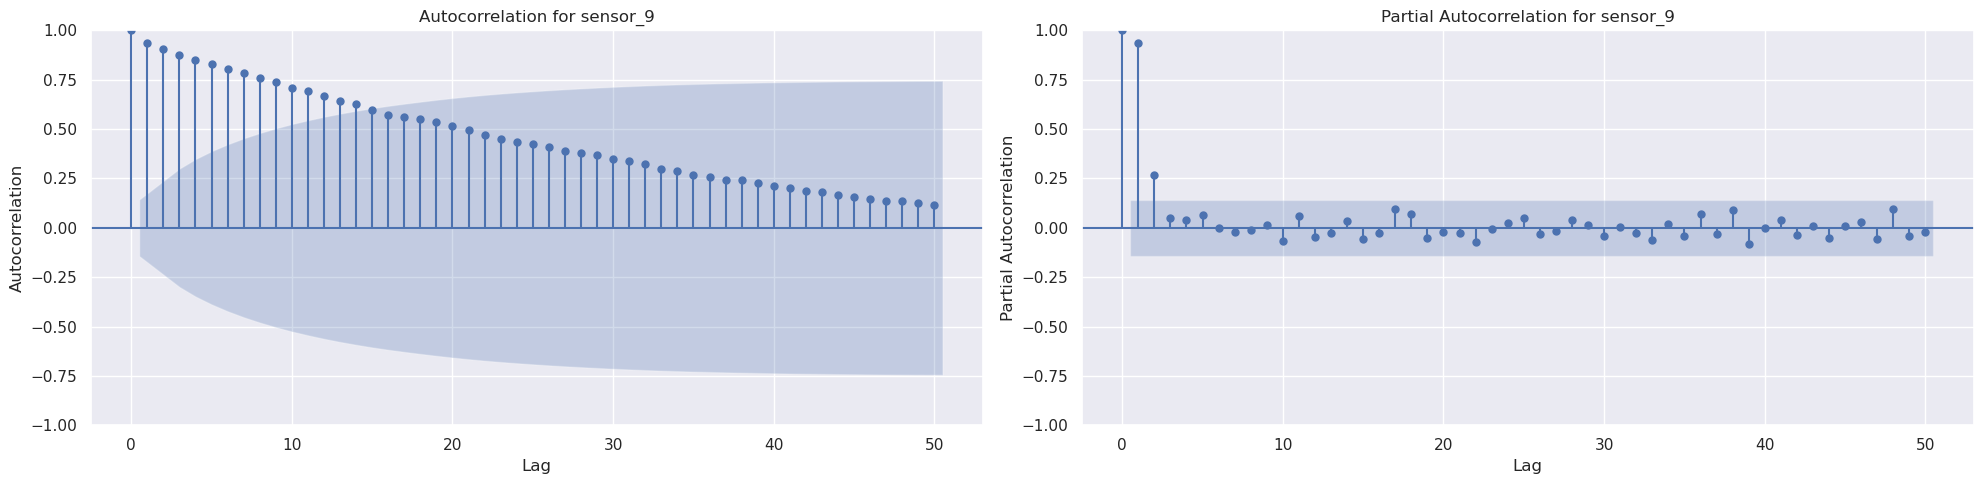

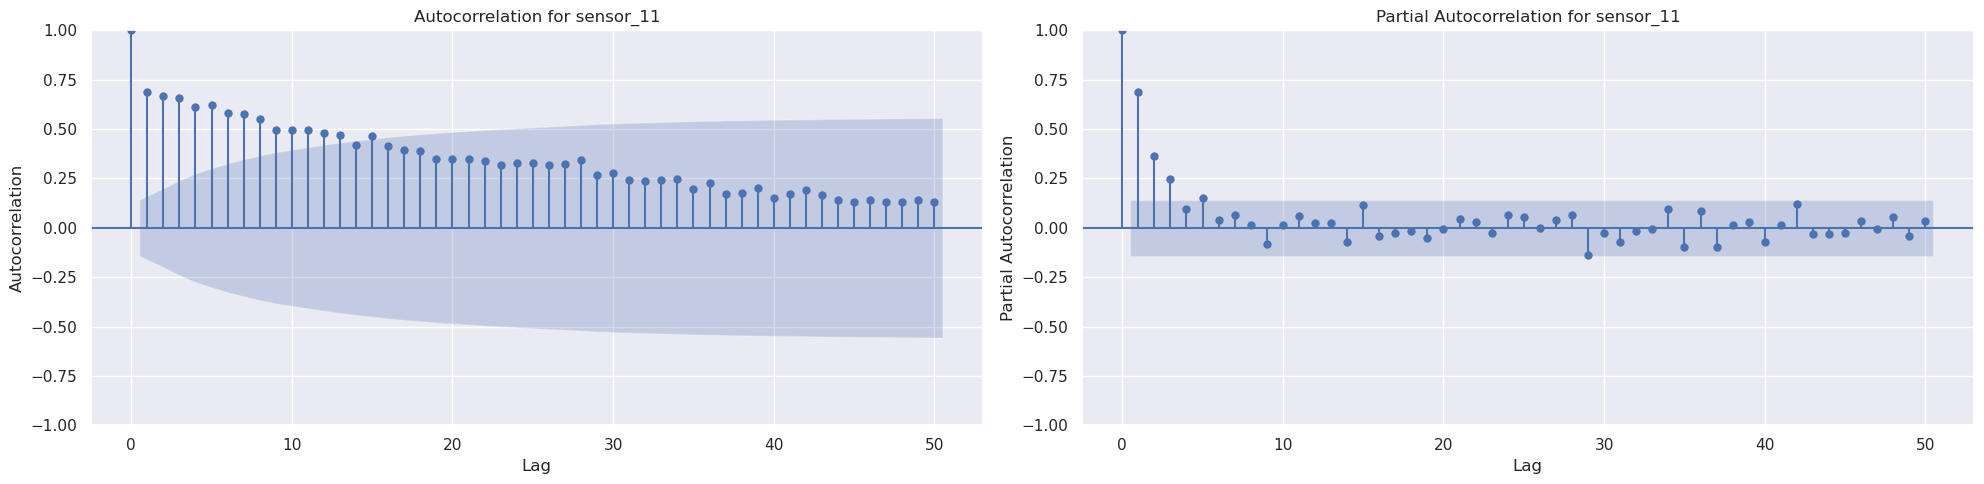

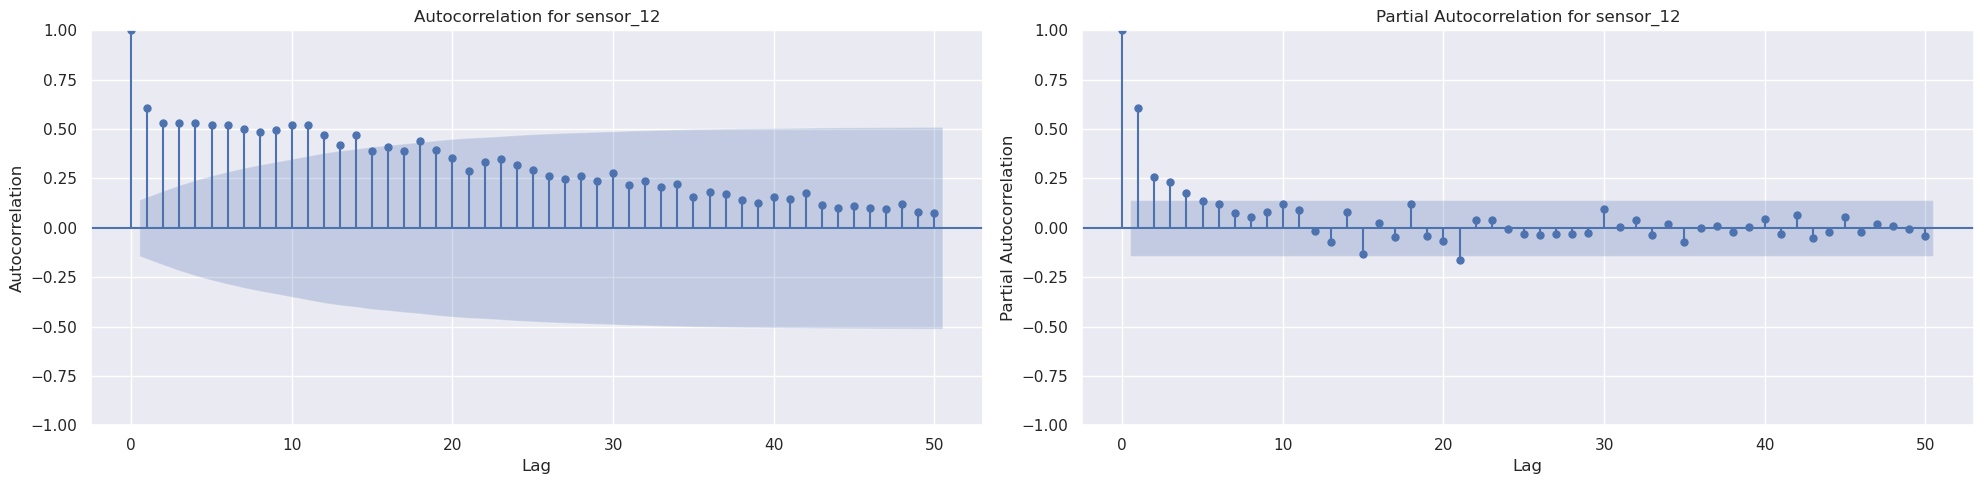

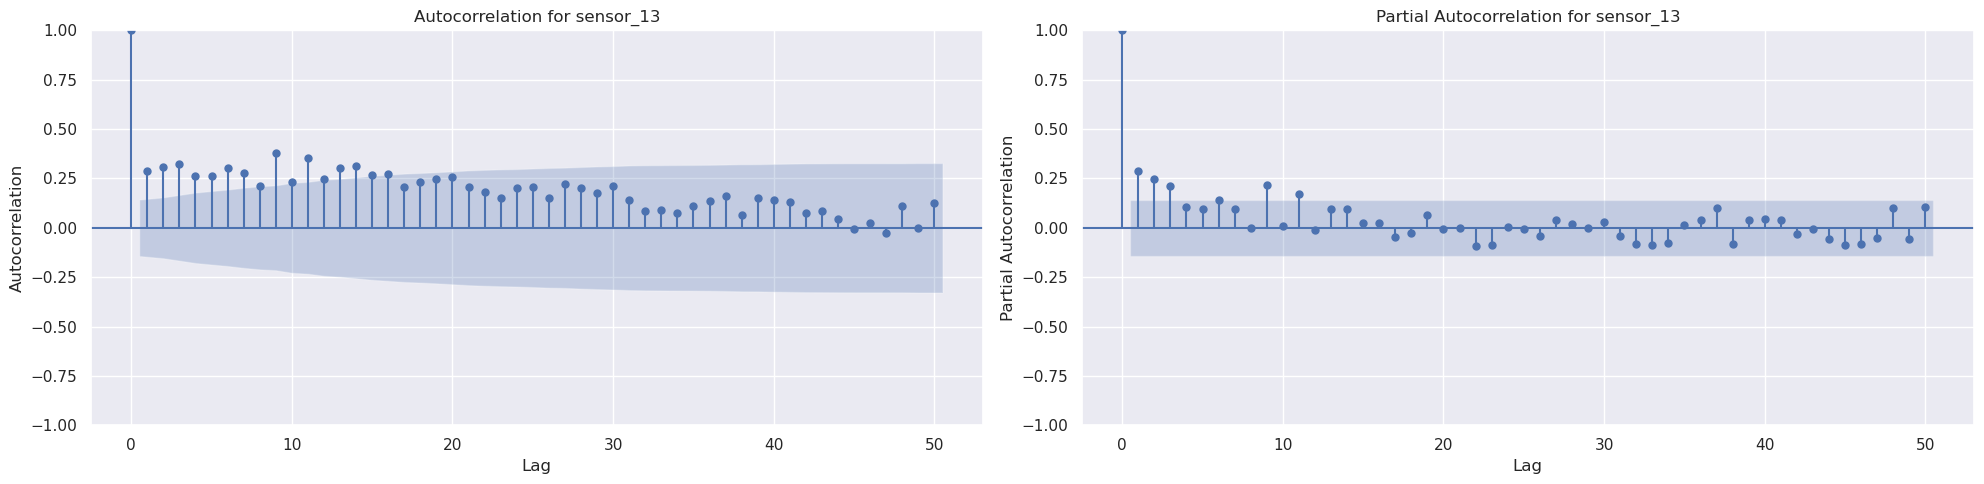

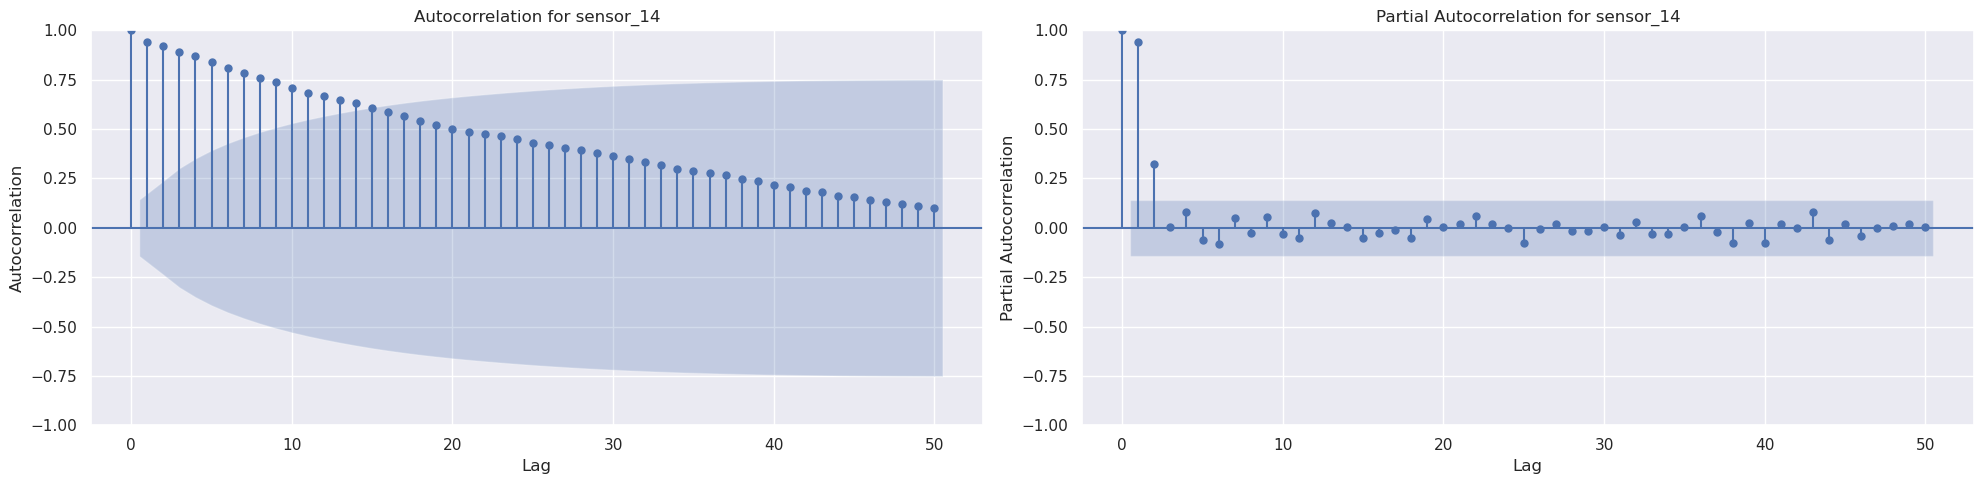

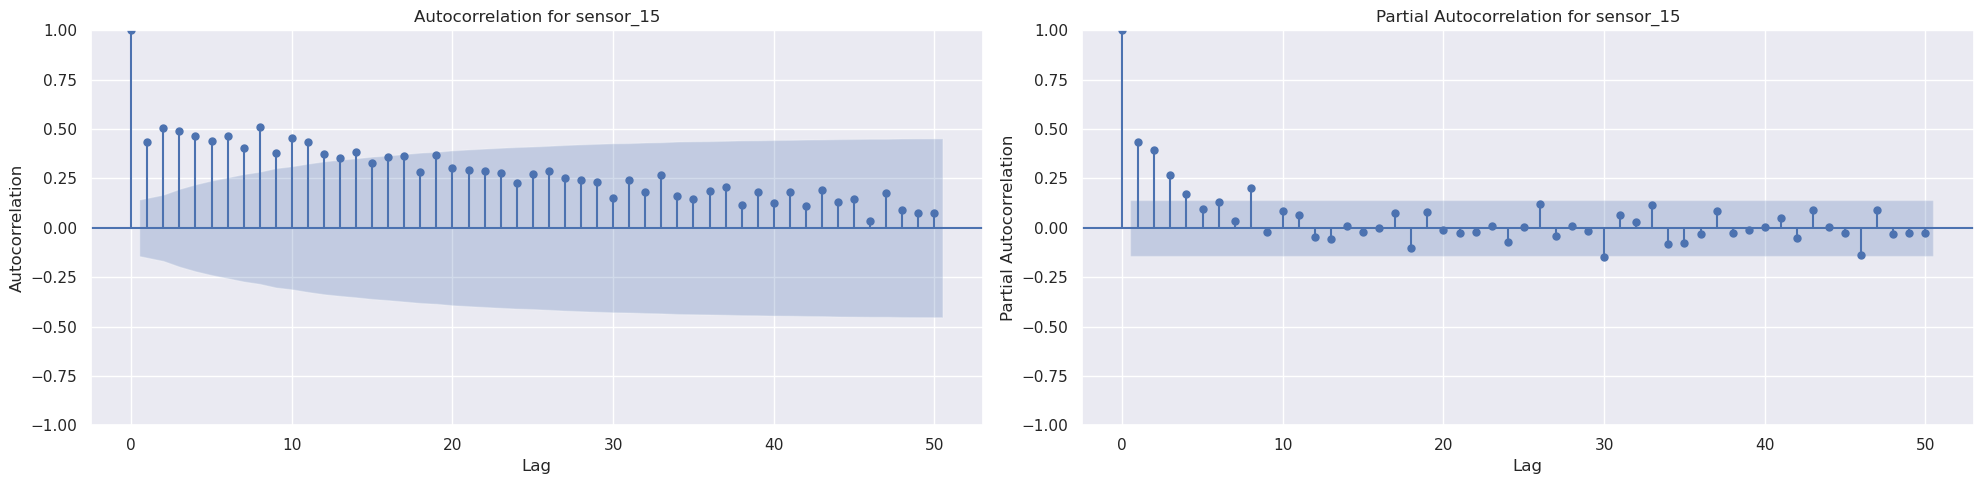

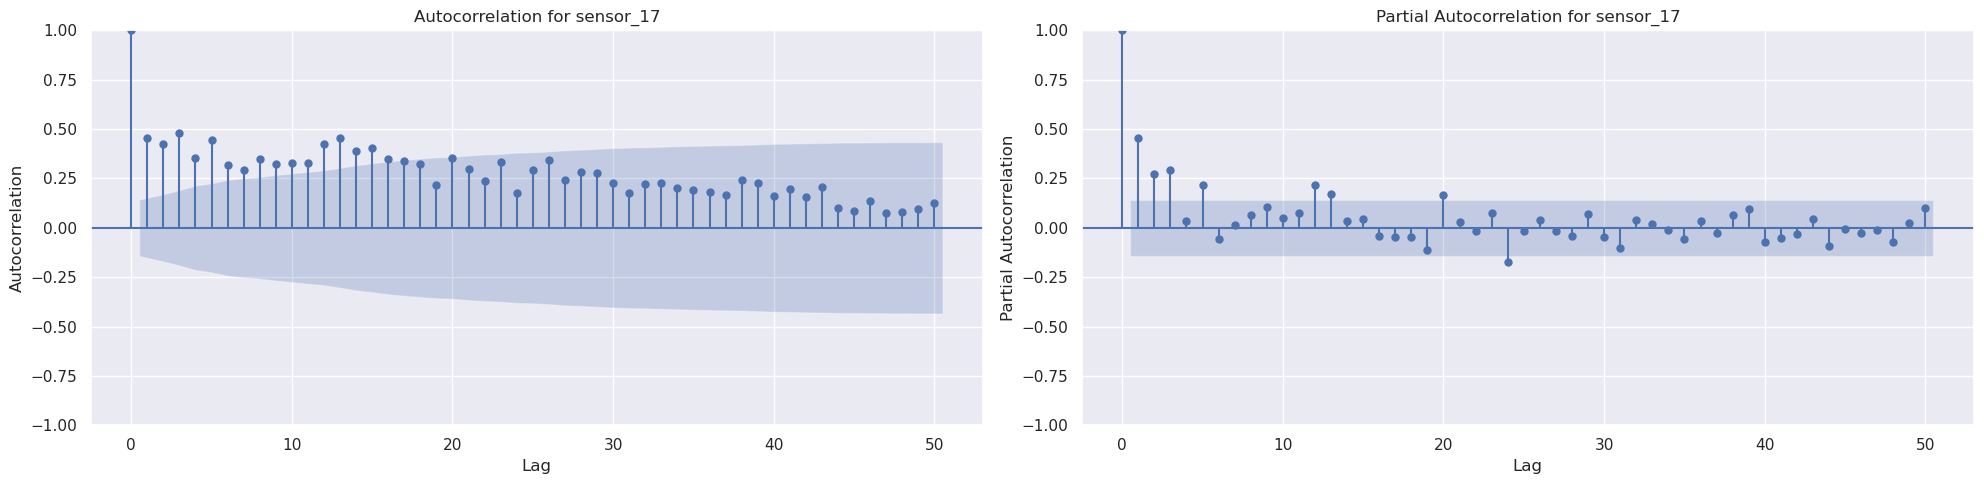

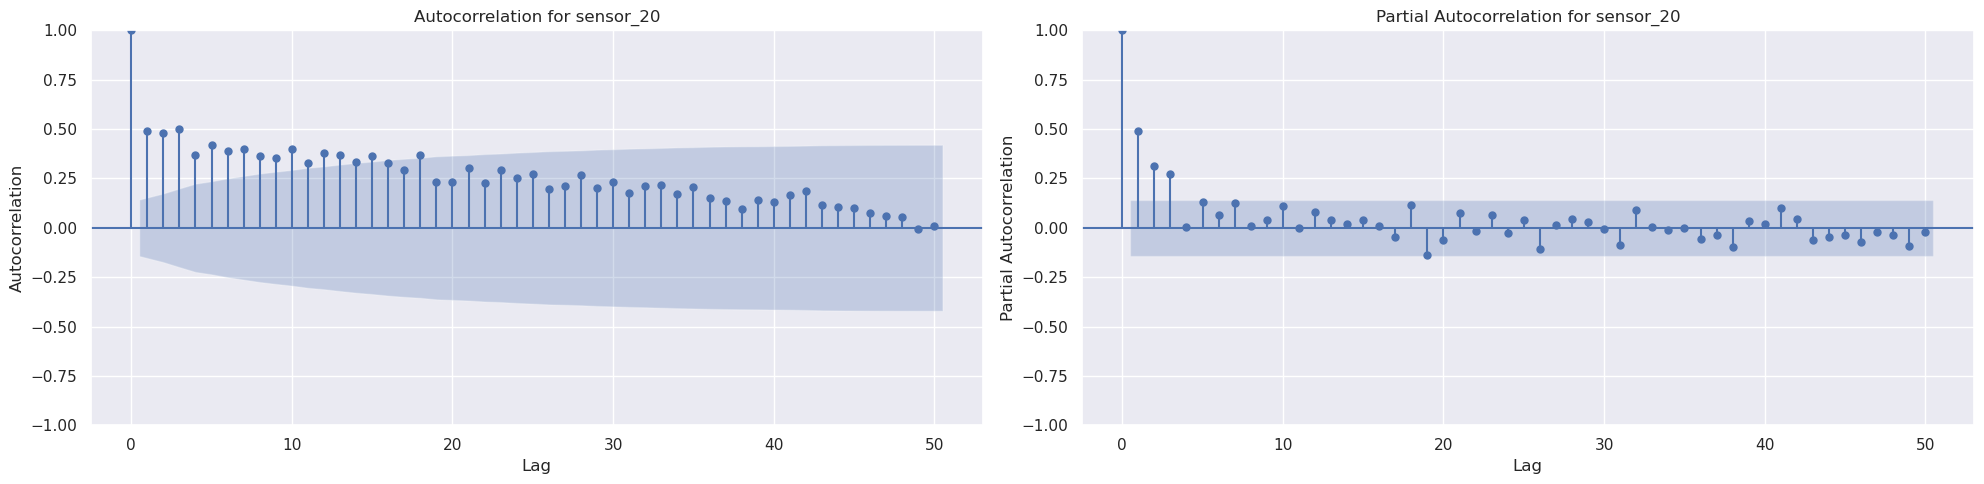

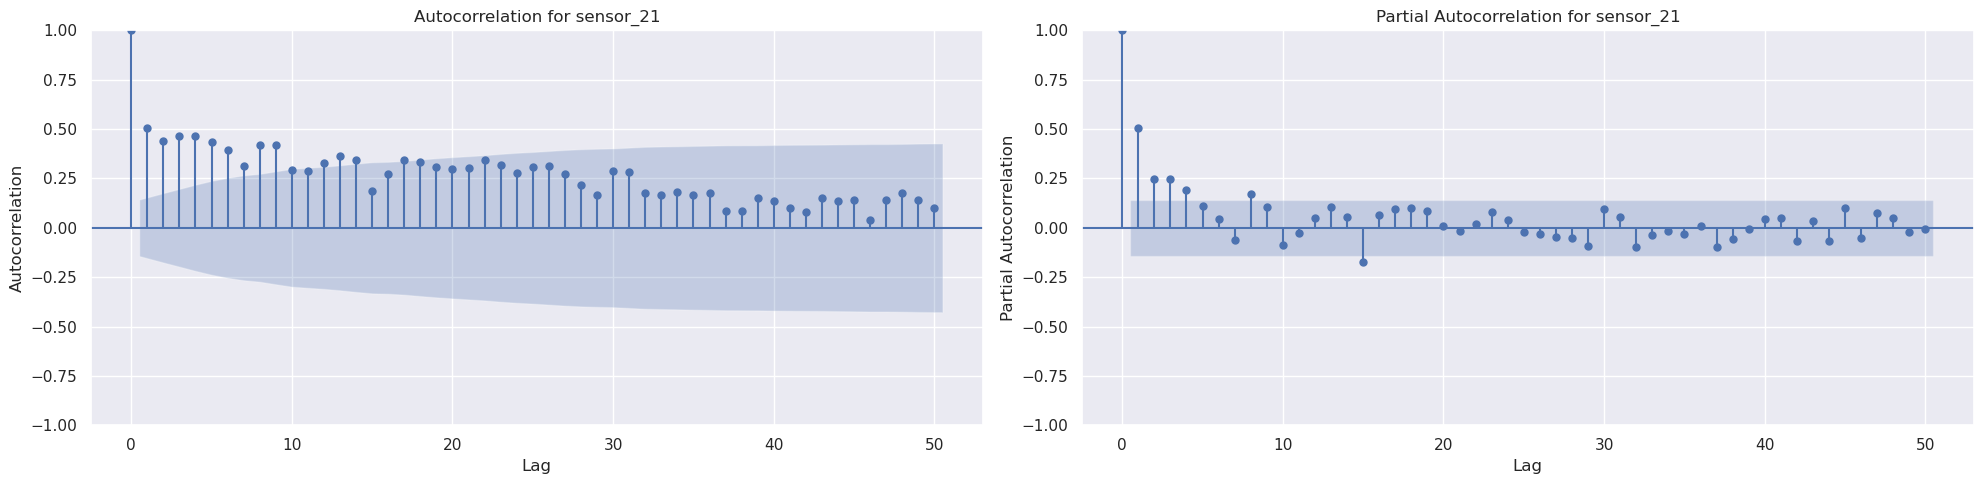

In [395]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

grouped = train_df.groupby('unit_number')

for unit, data in grouped:
    if unit == 40: # show just for one unit
        print("Autocorellation and Partial Correlation for sensors of motor unit ", unit)
            
        for sensor in sensor_names:
            fig, axes = plt.subplots(1, 2, figsize=(20, 5))
            sensor = sensor
            
            # ACF plot
            plot_acf(data[sensor], lags=50, ax=axes[0])
            axes[0].set_title(f'Autocorrelation for {sensor}')
            axes[0].set_xlabel('Lag')
            axes[0].set_ylabel('Autocorrelation')
            
            # PACF plot
            plot_pacf(data[sensor], lags=50, ax=axes[1])
            axes[1].set_title(f'Partial Autocorrelation for {sensor}')
            axes[1].set_xlabel('Lag')
            axes[1].set_ylabel('Partial Autocorrelation')
            
            # Adjust layout to prevent overlap
            plt.tight_layout()
            plt.show()

- ACF plot:slow decay, sifnicant correlation to lags until around lag 10-13
- PCF plot: sharp cutoff at around 1-2 lags

# 7. Seasonal Decomposition
Seasonality: recurring patterns or fluctuations that exhibit regularity at fixed intervals over time.

tested for one sensor and one unit

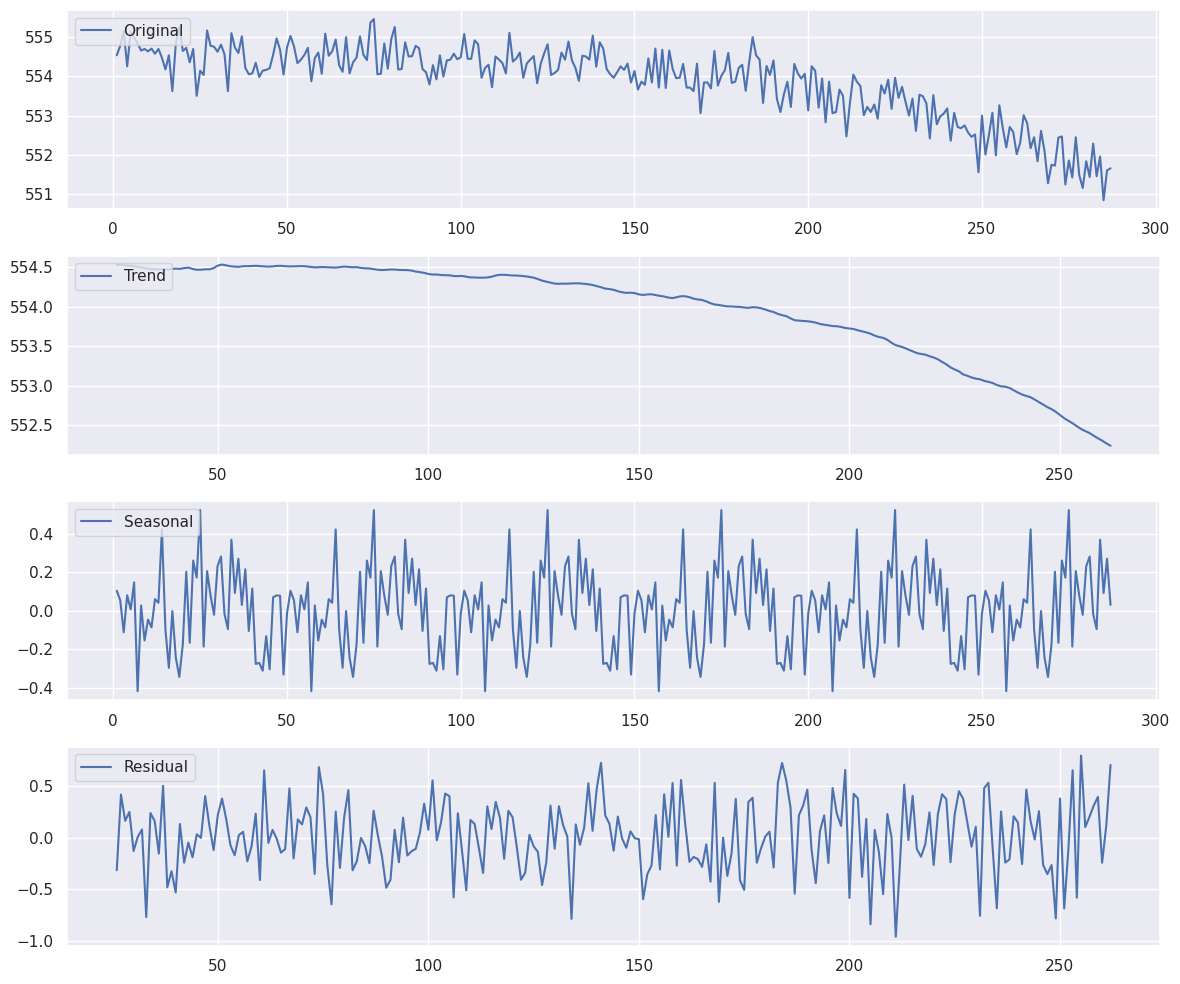

In [396]:
from statsmodels.tsa.seasonal import seasonal_decompose


unit_df = train_df[train_df['unit_number'] == unit_id]

# Decompose time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(unit_df['sensor_7'], period=50)  # Adjust period as needed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(unit_df['cycle'], unit_df['sensor_7'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(unit_df['cycle'], trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(unit_df['cycle'], seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(unit_df['cycle'], residual, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Observing some examples for unit ans sensor there seems to be some seasonality and fluctuations at regular patterns. Therefore, it might be helpful to remove seasonality, e.g. through Moving Average Smoothing with size of season interval to smooth out data  and better analyze the underlying trend.